In [15]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
from glob import glob

sns.set(context='talk', style='white')

study_dir = '/Users/catcamacho/Library/CloudStorage/Box-Box/CRAB/CRAB_lab/studies/crab-seal_hbcdmovies_pilot_2025'
data_dir = os.path.join(study_dir, 'DATA','V1_motion_processed')
figs_dir = './figs'
subinfo = pd.read_csv(os.path.join(study_dir,'DATA','redcap_exports','ChildMovieStudy-Basics_DATA_2025-06-30_1131.csv'),index_col=0)
clipinfo = pd.read_csv(os.path.join(study_dir, 'measures','clips','clipinfo.csv'), index_col=0)

subs = sorted(os.listdir(data_dir))
subinfo.index = subinfo.index.astype(str)
print('Sample size analyzed so far: {0}'.format(len(subs)))

Sample size analyzed so far: 41


## Motion plots
Notes
* meanFD = average FD across the movie
* pcCens9 = pecent censored if the FD threshold is 0.9mm FD
* pcCens2 = pecent censored if the FD threshold is 0.2mm FD
* each dot is color coded by participant ID (some colors are very similar though)

In [17]:
data = pd.DataFrame()
i=0
for sub in subs:
    subdata = pd.read_csv(os.path.join(data_dir, sub, '{0}_motion_summary.csv'.format(sub)), index_col=0)
    for movie in subdata.index:
        data.loc[i, 'sub'] = sub
        try:
            data.loc[i, 'age'] = subinfo.loc[sub, 'child_age_realtime']
            data.loc[i, 'sex'] = subinfo.loc[sub, 'c_gender']
        except:
            pass
        data.loc[i, 'movie'] = movie
        data.loc[i, 'human'] = clipinfo.loc[movie,'humans']
        data.loc[i, 'speaking'] = clipinfo.loc[movie,'speaking']
        data.loc[i, 'contained'] = clipinfo.loc[movie,'contained']
        data.loc[i, 'meanFD'] = subdata.loc[movie, 'meanFD']
        data.loc[i, 'pcCens9'] = subdata.loc[movie, 'pcent_volscens_0.9']
        data.loc[i, 'pcCens2'] = subdata.loc[movie, 'pcent_volscens_0.2']
        try:
            data.loc[i, 'interest'] = subdata.loc[movie, 'interest']
            data.loc[i, 'pos_aff'] = subdata.loc[movie, 'pos_aff']
            data.loc[i, 'neg_aff'] = subdata.loc[movie, 'neg_aff']
            data.loc[i, 'aff_intensity'] = subdata.loc[movie, 'aff_intensity']
        except:
            pass
        i=i+1

data = data.sort_values('movie')
#data.describe()

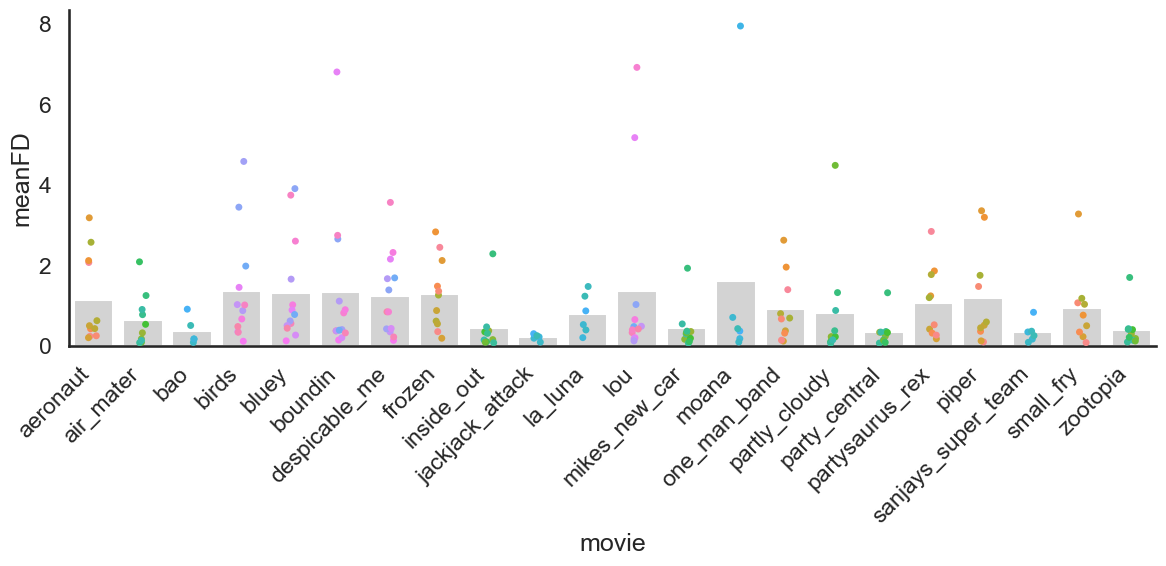

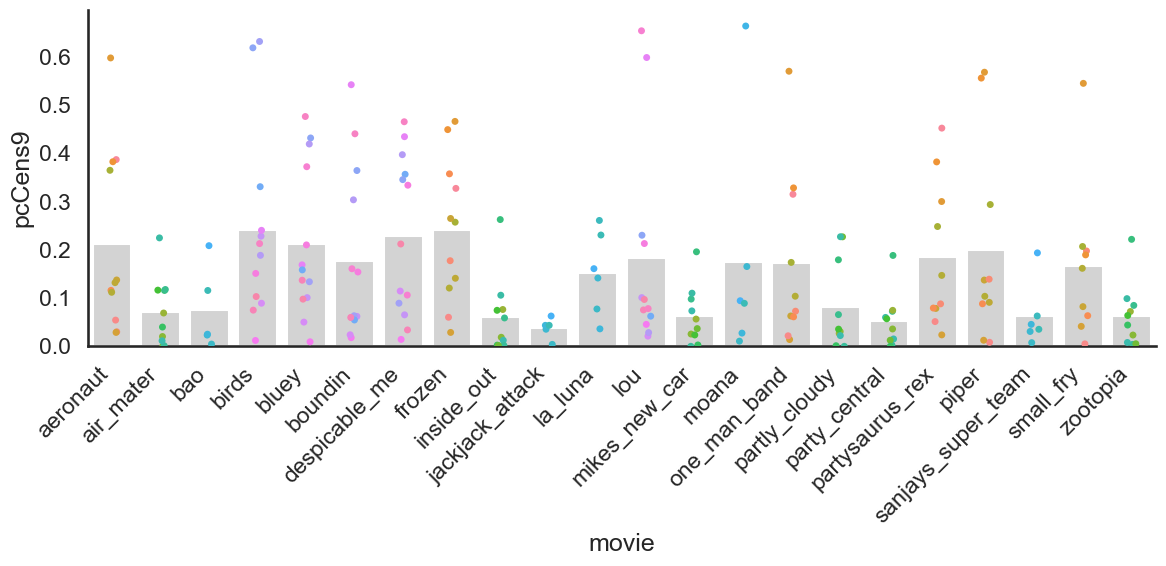

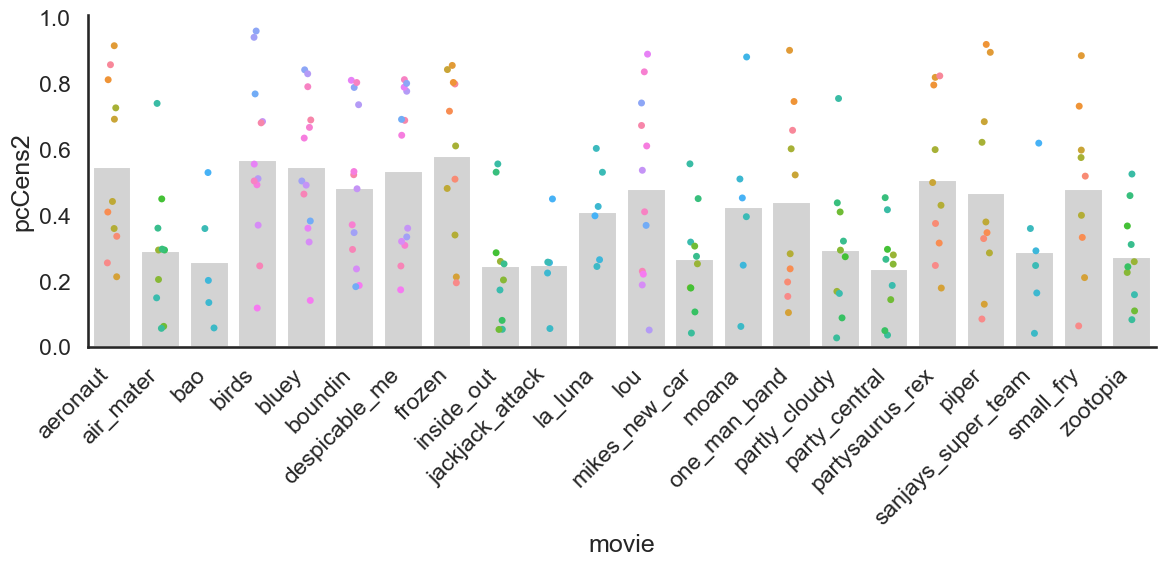

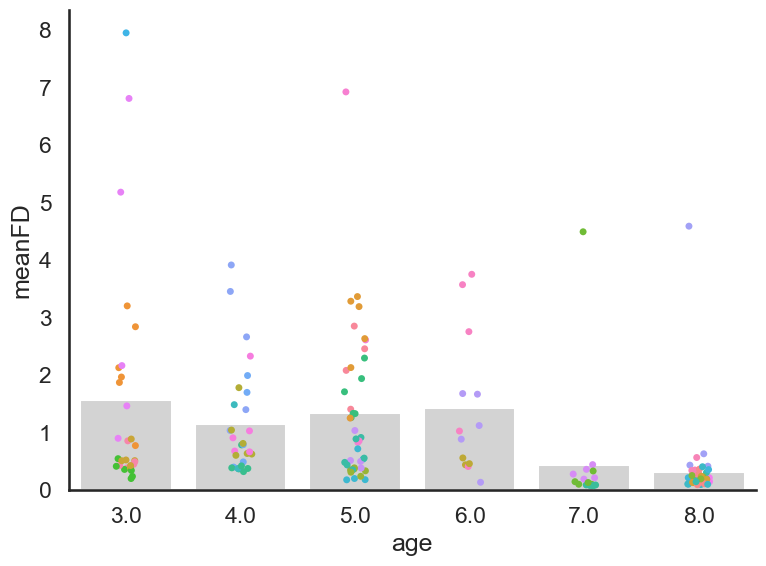

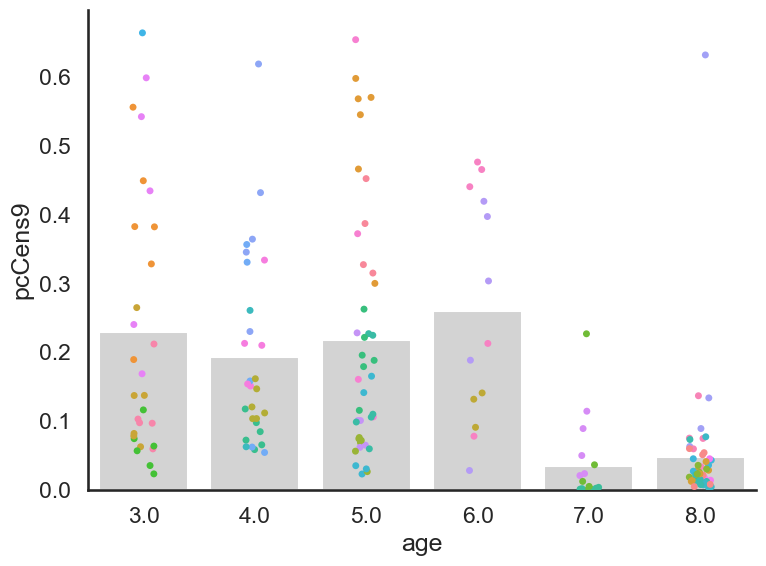

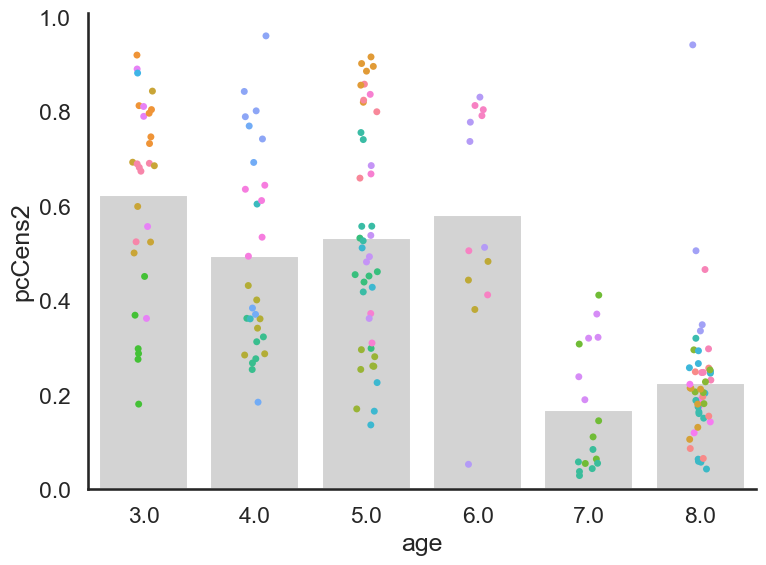

In [18]:
# plot mean FD

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=data, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='movie', data=data, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(8,6))
    sns.barplot(y=v, x='age', data=data, color='lightgray',errwidth=0)
    sns.stripplot(y=v, x='age', data=data, hue='sub')
    plt.legend().remove()
    sns.despine()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_age_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

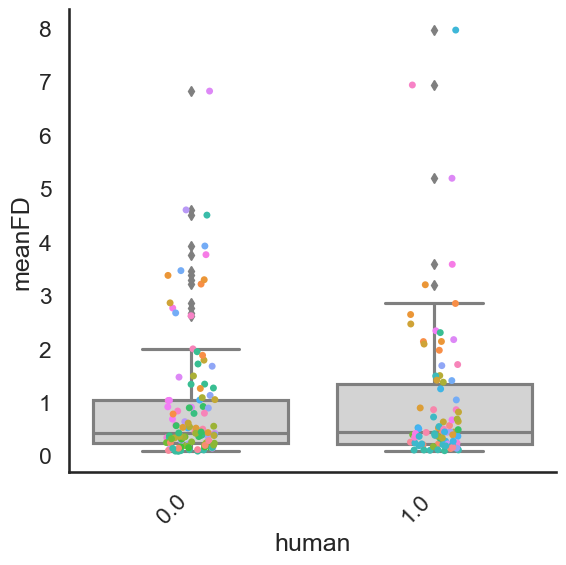

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: meanFD   
No. Observations: 149     Method:             REML     
No. Groups:       30      Scale:              0.5100   
Min. group size:  1       Log-Likelihood:     -204.9737
Max. group size:  6       Converged:          Yes      
Mean group size:  5.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.102    0.261  4.227 0.000  0.591  1.613
human        -0.030    0.133 -0.225 0.822 -0.291  0.231
sub Var       1.814    0.911                           



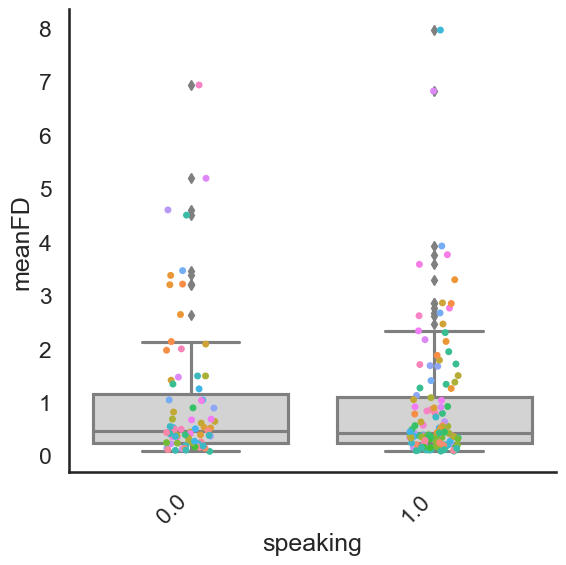

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: meanFD   
No. Observations: 149     Method:             REML     
No. Groups:       30      Scale:              0.5050   
Min. group size:  1       Log-Likelihood:     -204.2866
Max. group size:  6       Converged:          Yes      
Mean group size:  5.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  0.991     0.266  3.724  0.000   0.469   1.512
speaking   0.158     0.131  1.202  0.229  -0.099   0.415
sub Var    1.800     0.903                              



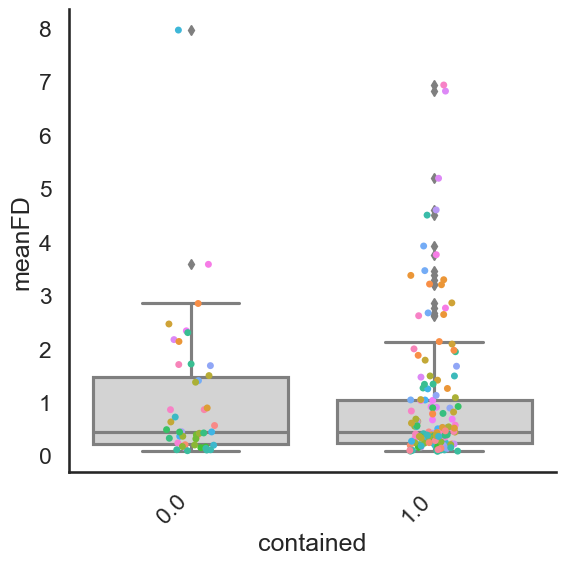

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: meanFD   
No. Observations: 149     Method:             REML     
No. Groups:       30      Scale:              0.5092   
Min. group size:  1       Log-Likelihood:     -204.5132
Max. group size:  6       Converged:          Yes      
Mean group size:  5.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.186    0.272  4.355 0.000  0.652  1.720
contained    -0.130    0.141 -0.926 0.355 -0.406  0.146
sub Var       1.773    0.892                           



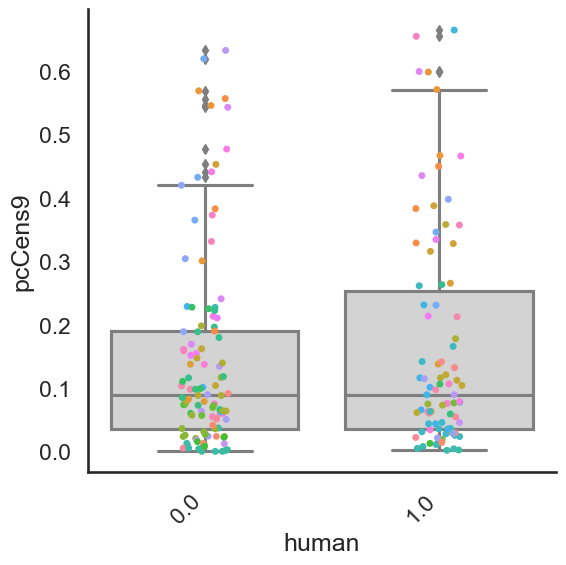

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens9 
No. Observations: 149     Method:             REML    
No. Groups:       30      Scale:              0.0074  
Min. group size:  1       Log-Likelihood:     108.4525
Max. group size:  6       Converged:          Yes     
Mean group size:  5.0                                 
------------------------------------------------------
              Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept     0.161    0.029 5.504 0.000  0.104  0.218
human         0.009    0.016 0.534 0.593 -0.023  0.040
sub Var       0.022    0.086                          



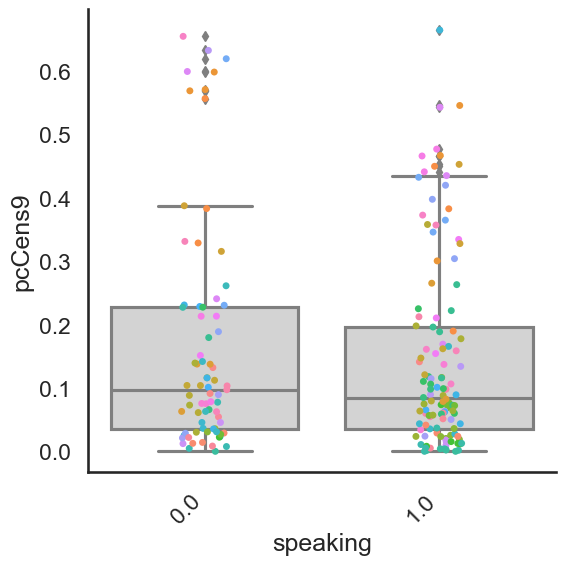

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens9 
No. Observations: 149     Method:             REML    
No. Groups:       30      Scale:              0.0073  
Min. group size:  1       Log-Likelihood:     108.5677
Max. group size:  6       Converged:          Yes     
Mean group size:  5.0                                 
------------------------------------------------------
              Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept     0.157    0.030 5.214 0.000  0.098  0.217
speaking      0.012    0.016 0.728 0.467 -0.019  0.043
sub Var       0.023    0.087                          



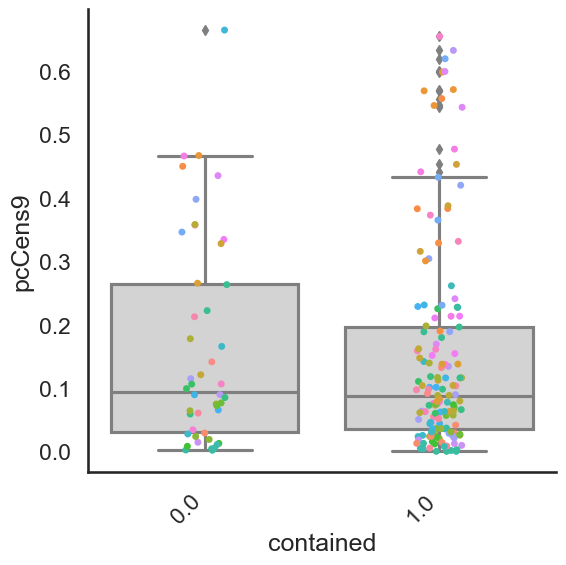

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens9 
No. Observations: 149     Method:             REML    
No. Groups:       30      Scale:              0.0072  
Min. group size:  1       Log-Likelihood:     110.3854
Max. group size:  6       Converged:          Yes     
Mean group size:  5.0                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.190    0.031  6.131 0.000  0.129  0.251
contained   -0.034    0.017 -2.024 0.043 -0.066 -0.001
sub Var      0.022    0.087                           



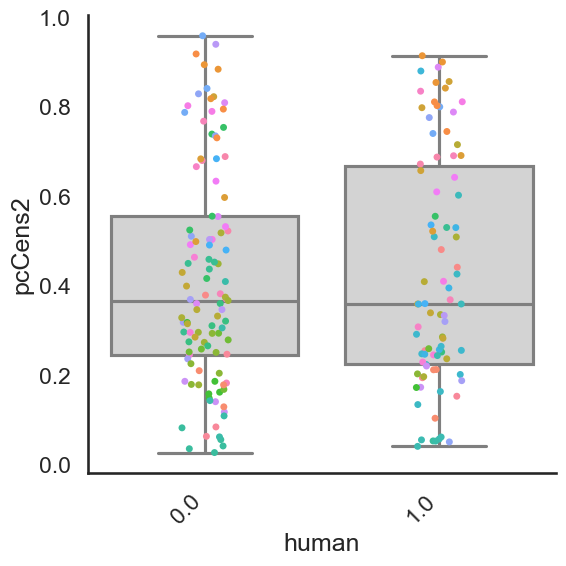

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens2
No. Observations: 149     Method:             REML   
No. Groups:       30      Scale:              0.0143 
Min. group size:  1       Log-Likelihood:     57.6633
Max. group size:  6       Converged:          Yes    
Mean group size:  5.0                                
-----------------------------------------------------
           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept   0.451    0.044 10.357 0.000  0.366  0.537
human      -0.007    0.022 -0.301 0.763 -0.050  0.037
sub Var     0.051    0.133                           



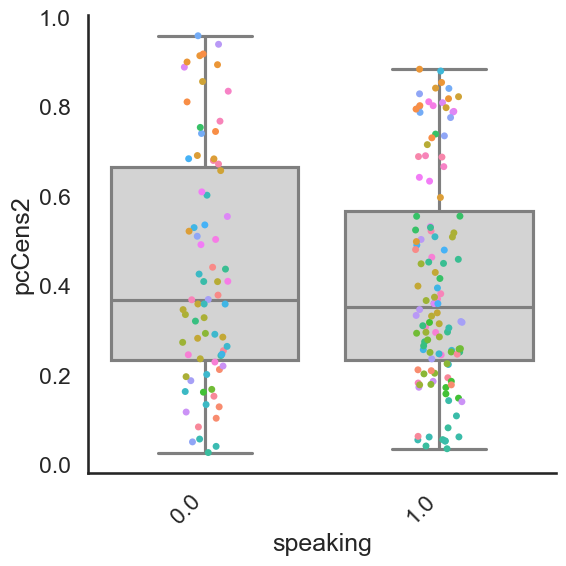

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens2
No. Observations: 149     Method:             REML   
No. Groups:       30      Scale:              0.0142 
Min. group size:  1       Log-Likelihood:     58.0515
Max. group size:  6       Converged:          Yes    
Mean group size:  5.0                                
-----------------------------------------------------
             Coef. Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept    0.435    0.045 9.735 0.000  0.348  0.523
speaking     0.021    0.022 0.941 0.347 -0.022  0.064
sub Var      0.051    0.134                          



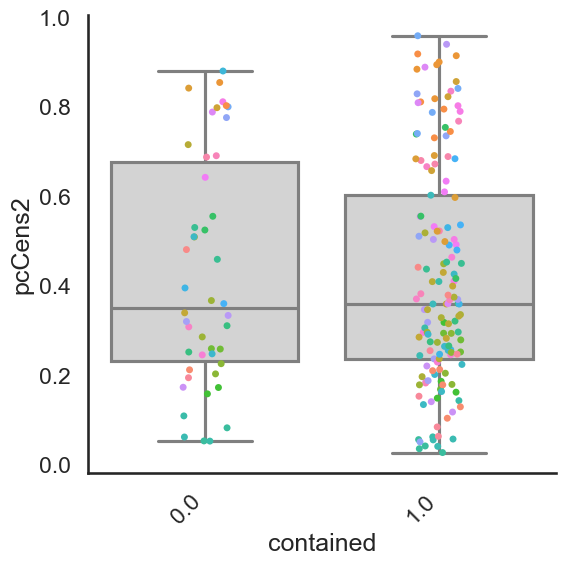

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens2
No. Observations: 149     Method:             REML   
No. Groups:       30      Scale:              0.0141 
Min. group size:  1       Log-Likelihood:     58.7009
Max. group size:  6       Converged:          Yes    
Mean group size:  5.0                                
-----------------------------------------------------
           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept   0.474    0.046 10.315 0.000  0.384  0.564
contained  -0.034    0.023 -1.439 0.150 -0.079  0.012
sub Var     0.051    0.133                           



In [6]:
for v in ['meanFD','pcCens9','pcCens2']:
    for f in ['human','speaking','contained']:

        plt.figure(figsize=(6,6))
        sns.boxplot(y=v,x=f, data=data, color='lightgray')
        sns.stripplot(y=v,x=f, data=data, hue='sub')
        plt.xticks(rotation=45, ha='right')
        sns.despine()
        plt.legend().remove()
        plt.tight_layout()
        plt.savefig(os.path.join(figs_dir, 'fullsample_feature_{0}_motion_{1}_plot.png'.format(f,v)), dpi=200)
        plt.show()
        plt.close()
        
        temp = data.dropna().copy()
        res = smf.mixedlm('{0} ~ {1}'.format(v,f), groups='sub', data=temp).fit()
        print(res.summary())

# Plots by age group

## 3-4 year olds (only 1 without sound so far)

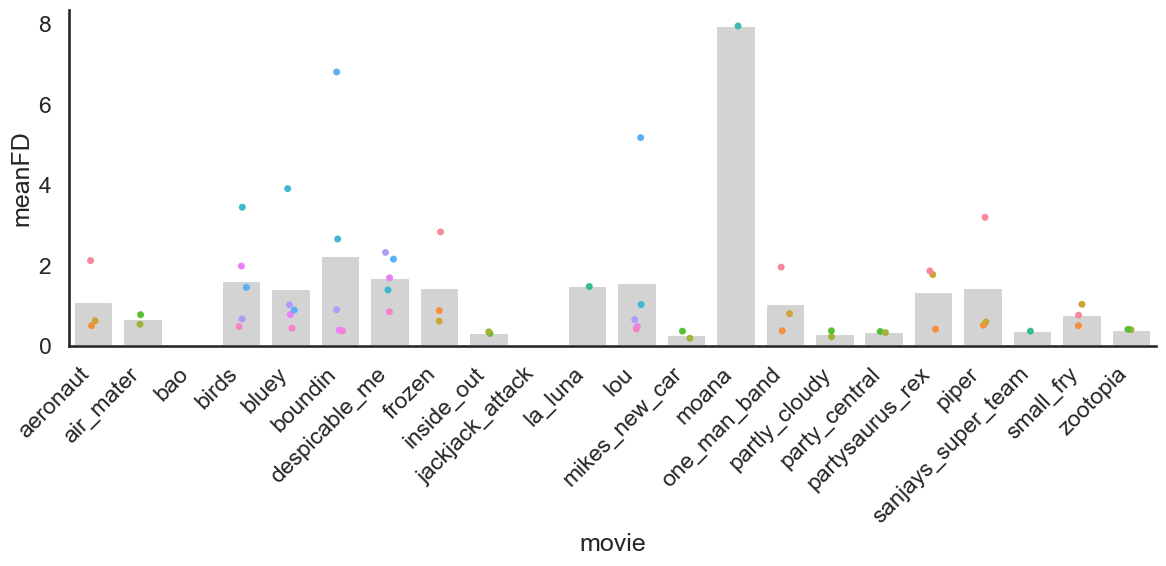

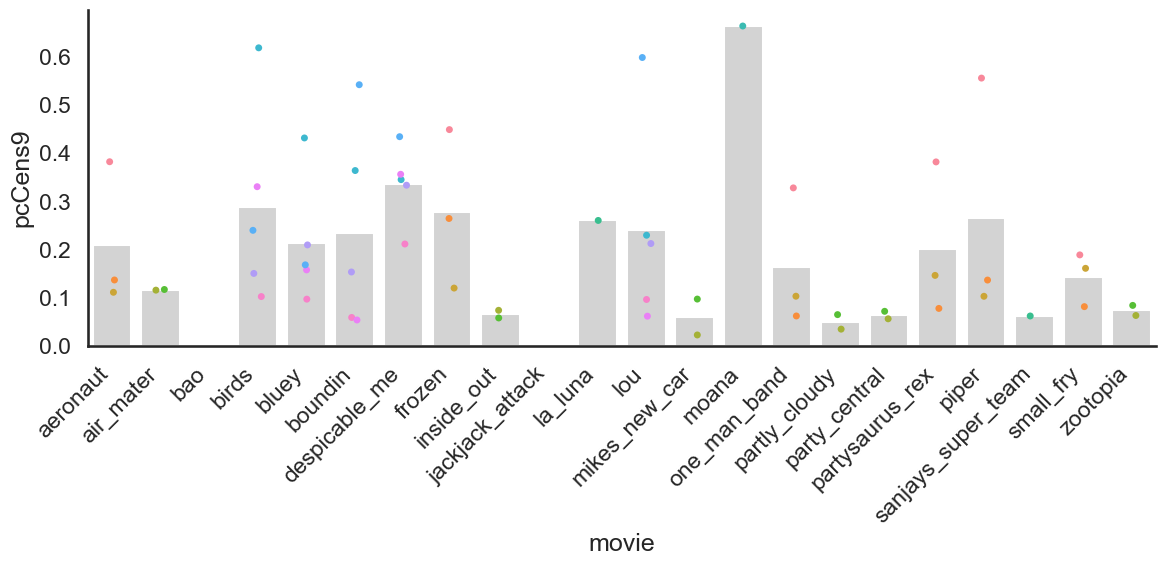

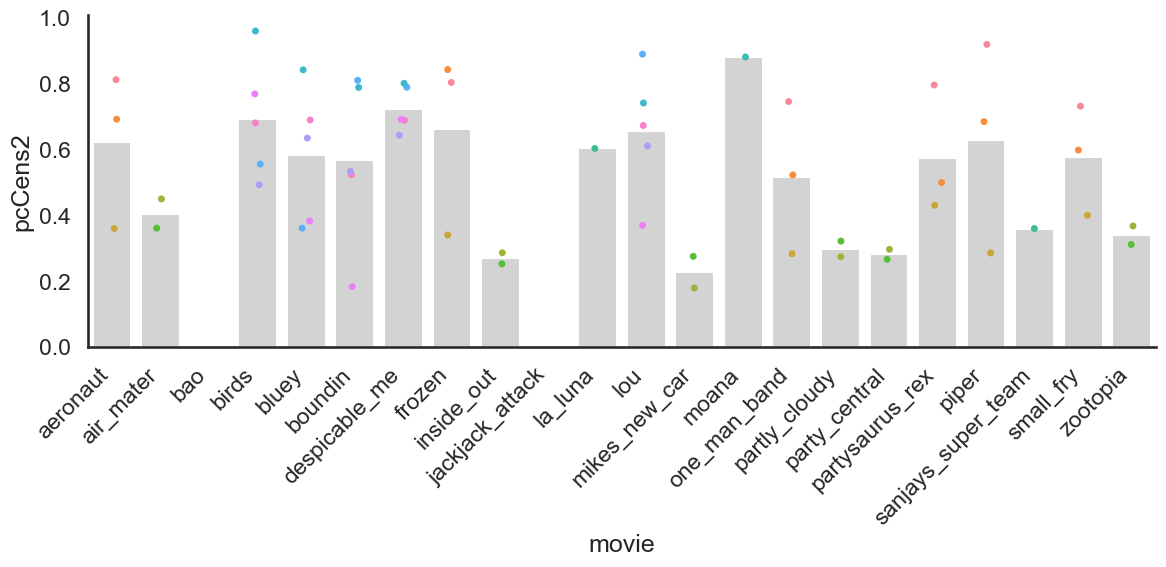

In [7]:
tempdata = data.loc[data['age']<5,:].copy()

# plot mean FD

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=tempdata, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='movie', data=tempdata, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'ages34_clip_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

## 5-6 year olds

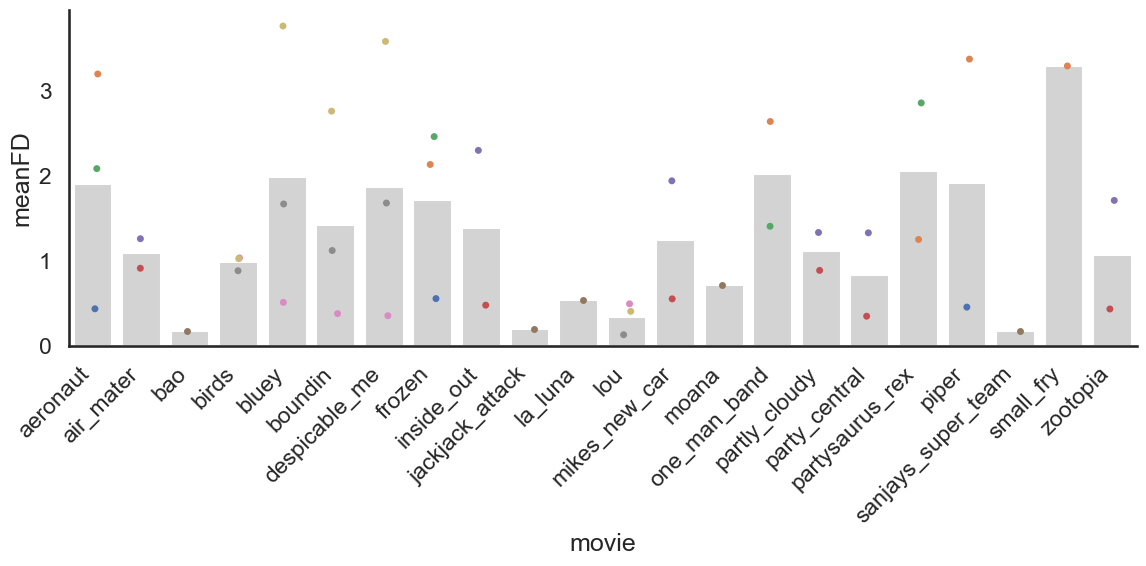

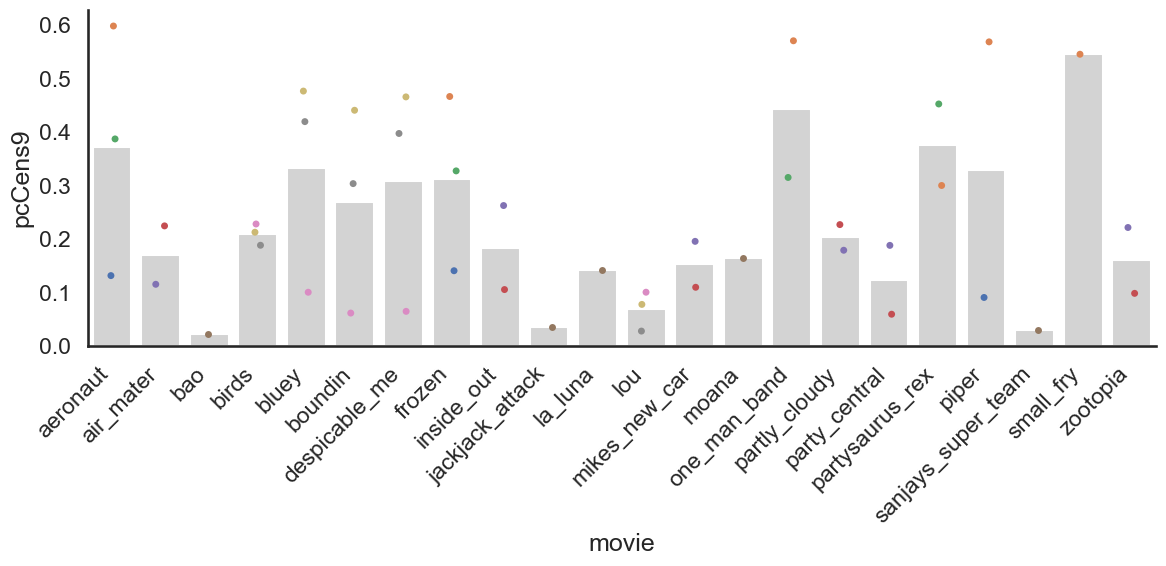

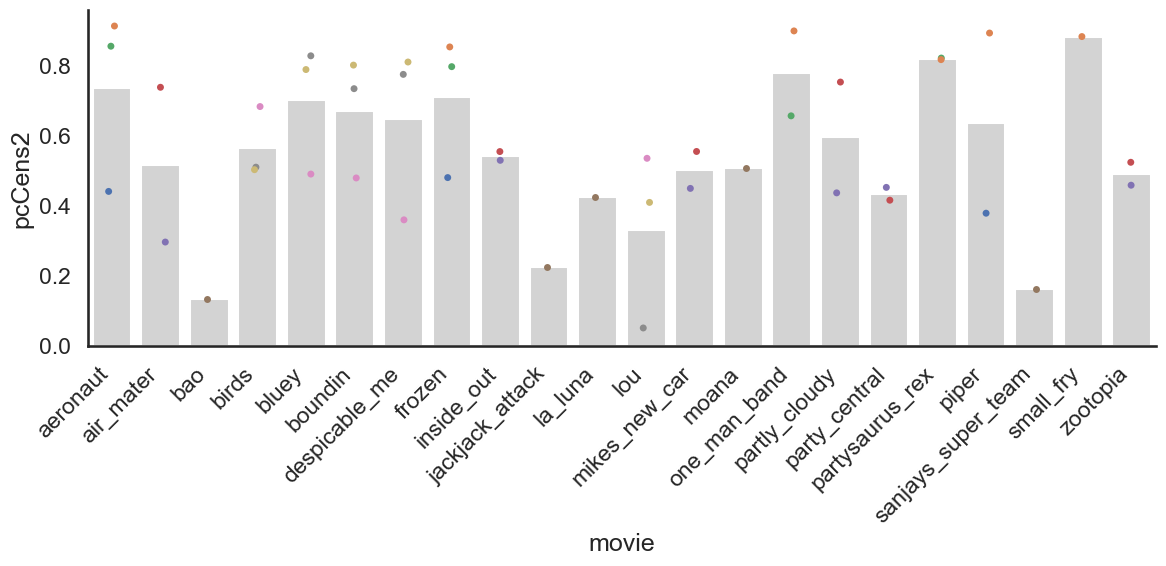

In [8]:
tempdata = data.loc[(data['age']==5) | (data['age']==6),:].copy()

# plot mean FD

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=tempdata, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='movie', data=tempdata, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'ages56_clip_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

## 7-8 year olds

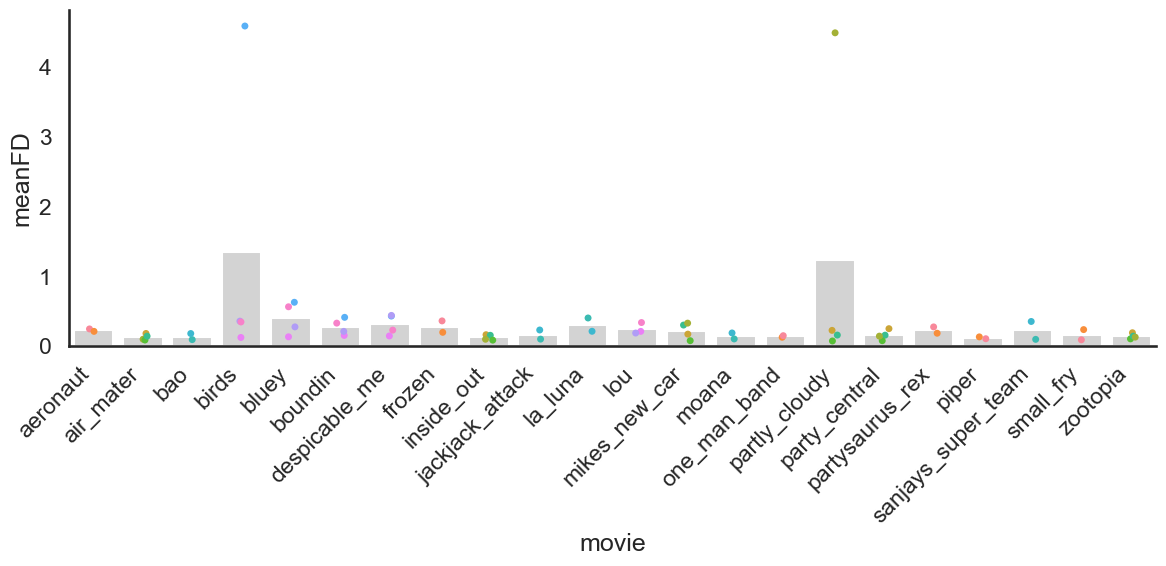

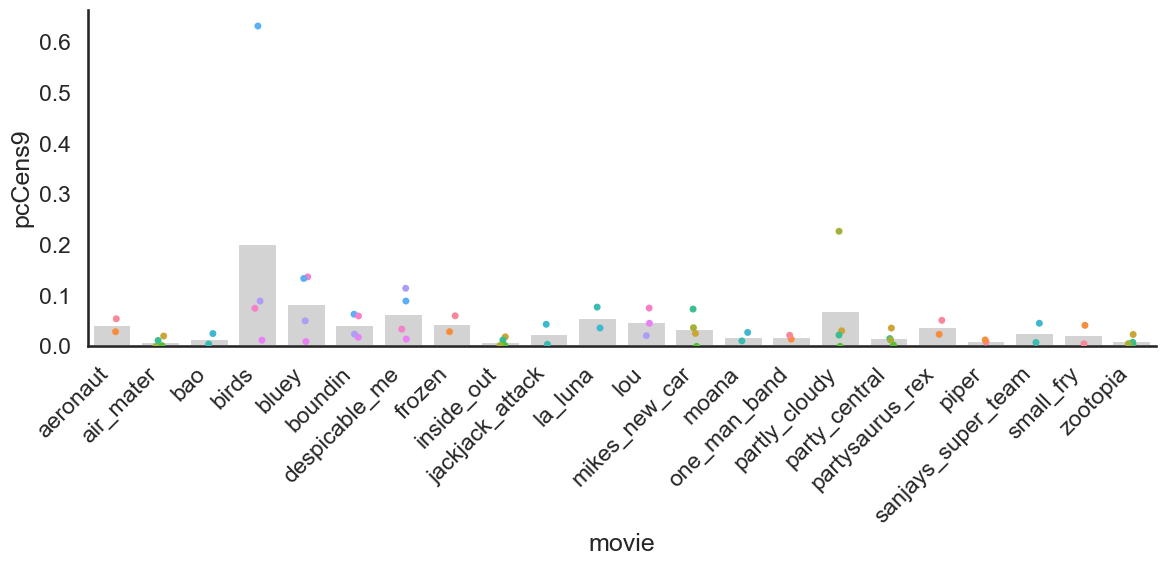

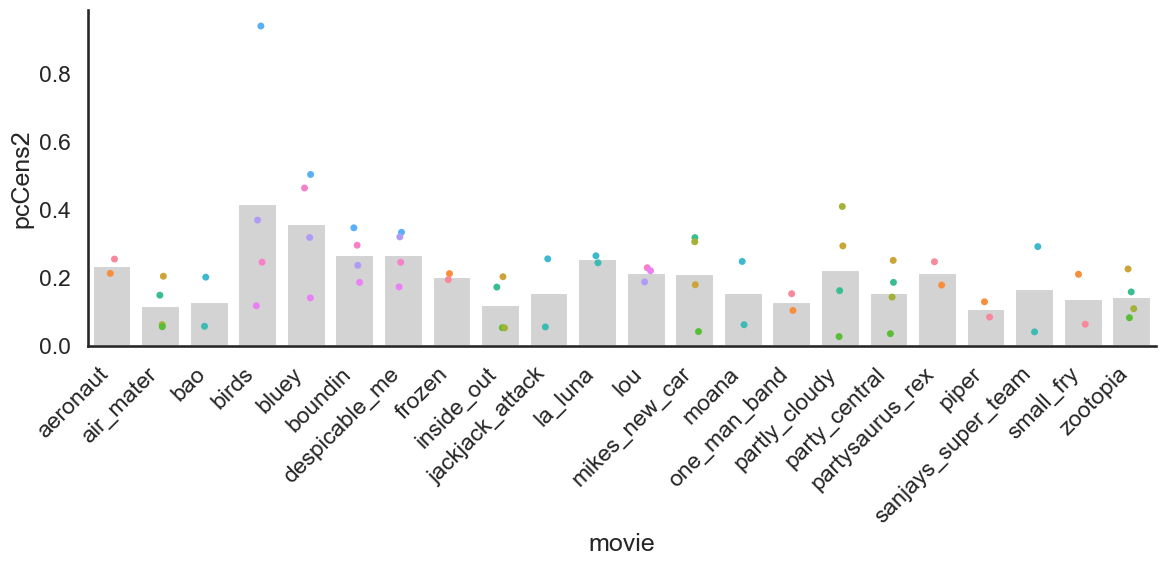

In [19]:
tempdata = data.loc[(data['age']==7) | (data['age']==8),:].copy()

# plot mean FD

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=tempdata, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='movie', data=tempdata, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'ages78_clip_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

# get timeseries of motion across clips

In [20]:
clipmotion = {}
for mov in clipinfo.index:
    clipmotion[mov] = pd.DataFrame(index=range(0,3001))

In [21]:
for sub in subs:
    print(sub)
    subdata = pd.read_csv(os.path.join(data_dir, sub, '{0}_motion_data_processed.csv'.format(sub)), index_col=0)
    clips = np.unique(subdata['title'].dropna())
    for clip in clips:
        temp = subdata.loc[subdata['title']==clip,'FD50'].to_numpy()
        clipmotion[clip].loc[:temp.shape[0]-1,sub] = temp
        

2002
2003
2004
2005
2006
2008
2009
2010
2011
2012
2014
2015
2016
2017
2018
2019
2020
2021
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2042
2043
2044
2045
2046
2051
2052


In [22]:
for mov in clipinfo.index:
    clipmotion[mov] = clipmotion[mov].dropna(axis=0,how='all')

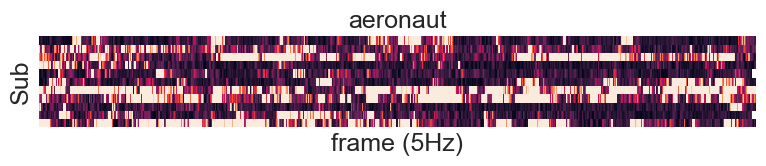

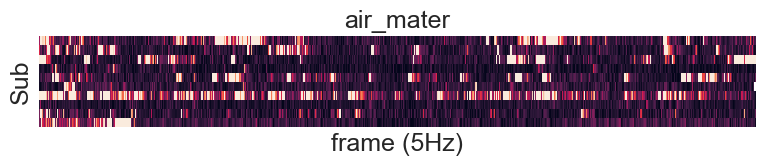

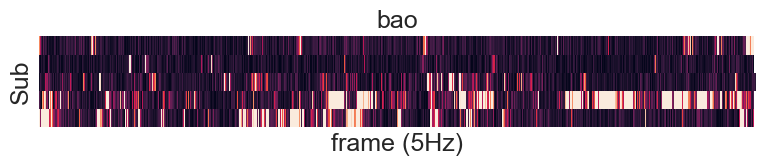

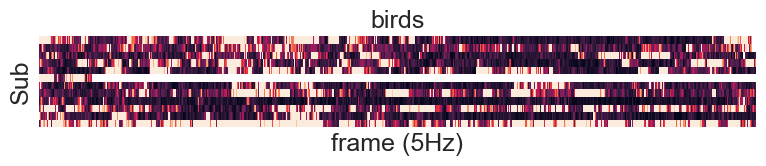

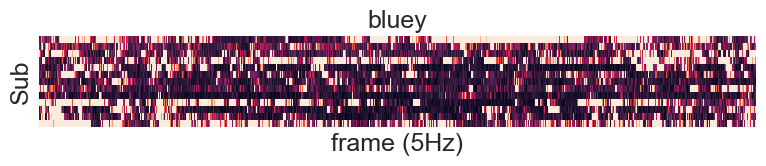

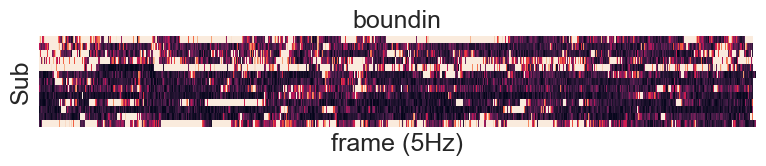

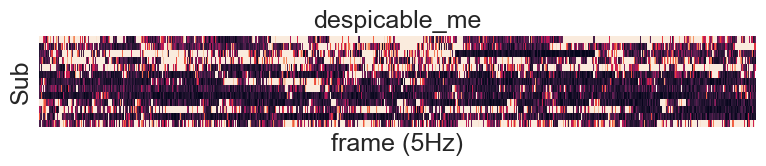

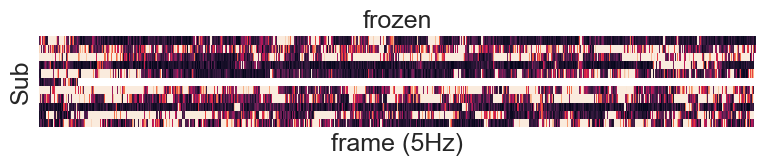

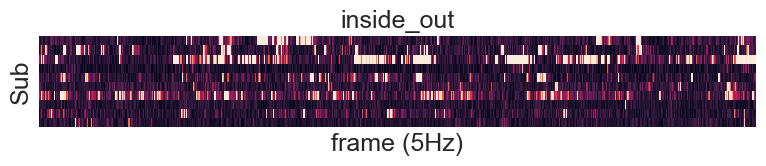

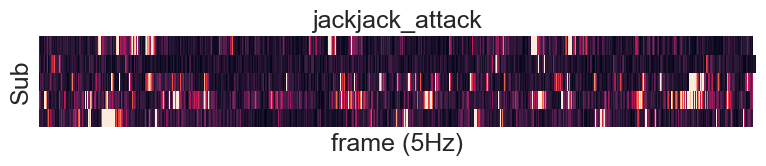

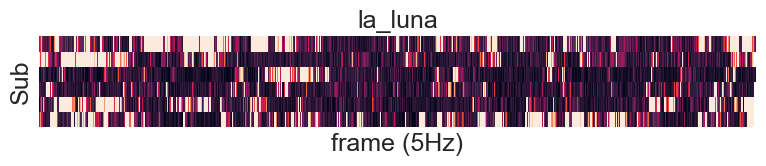

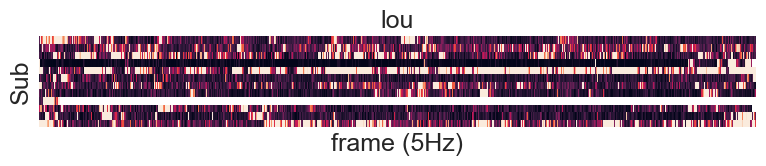

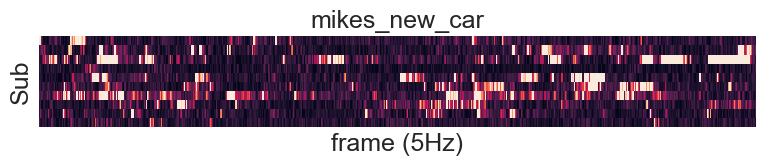

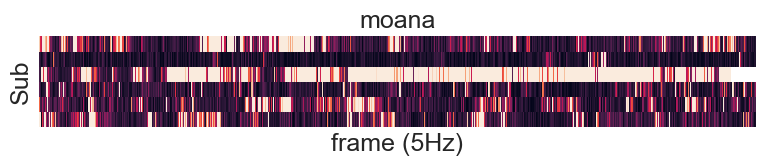

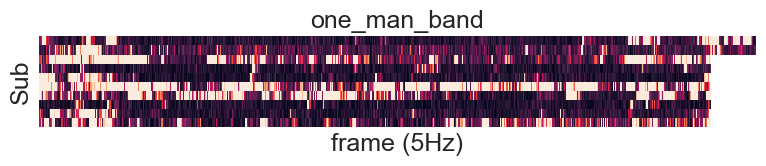

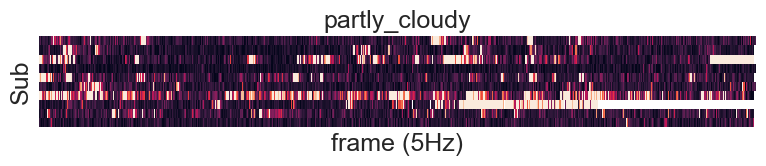

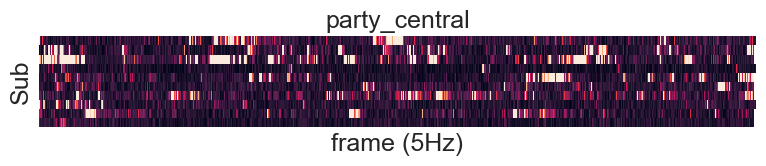

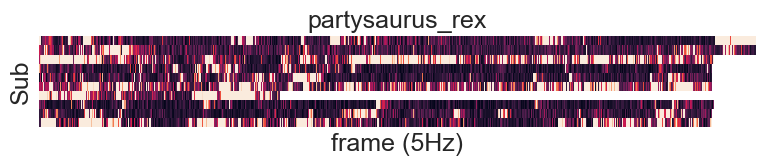

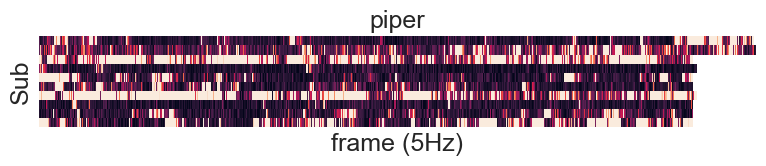

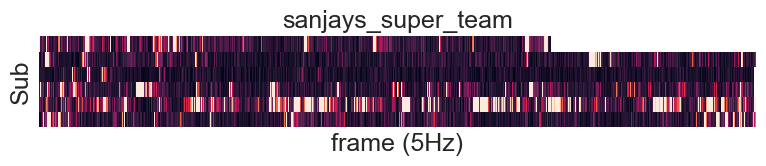

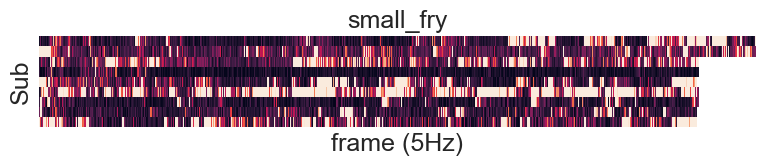

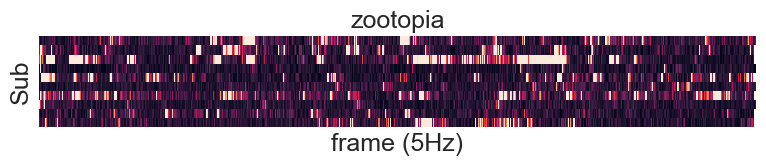

In [23]:
for mov in clipinfo.index:
    plt.figure(figsize=(8,2))
    sns.heatmap(clipmotion[mov].T, vmax=1, cbar=False)   
    plt.xticks([])
    plt.ylabel('Sub')
    plt.xlabel('frame (5Hz)')
    plt.yticks([])
    plt.title(mov)
    
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_{0}_motion_FD_timeplot.png'.format(mov)), dpi=200)
    plt.show()
    plt.close()

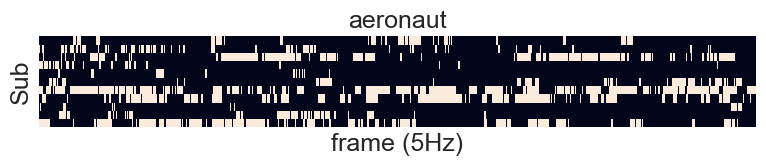

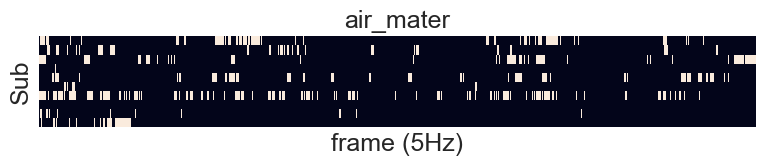

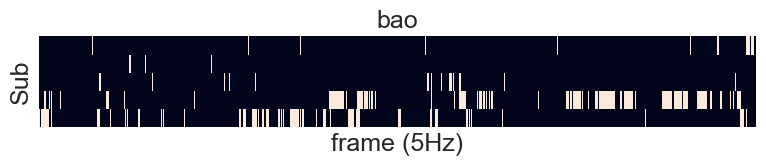

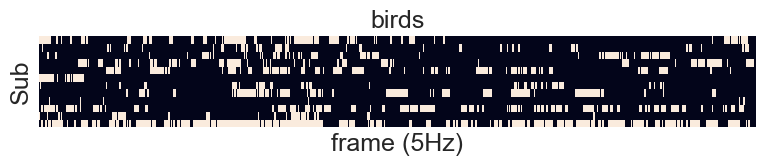

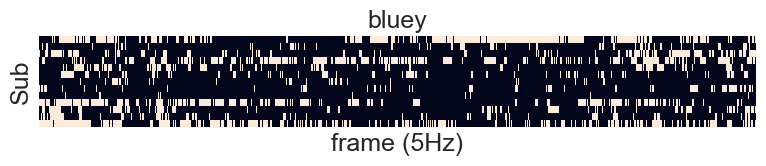

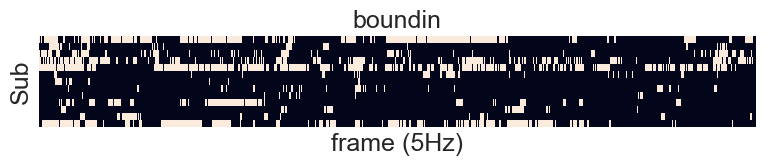

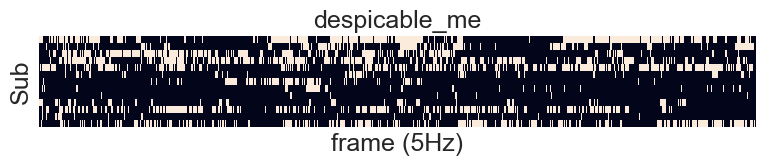

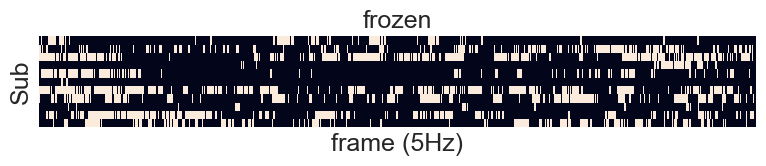

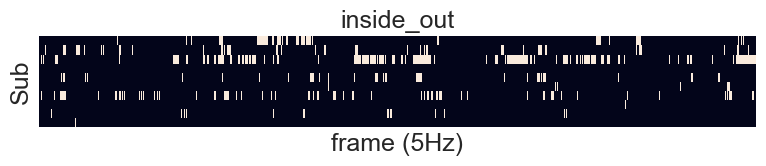

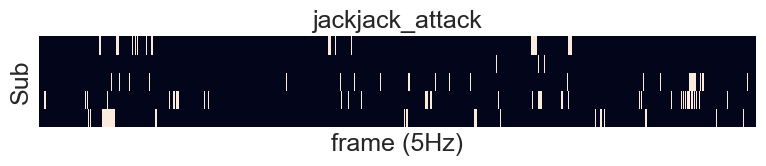

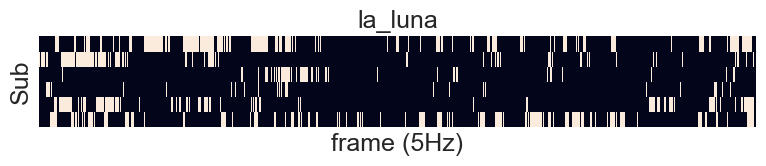

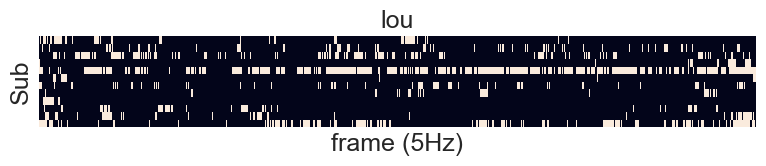

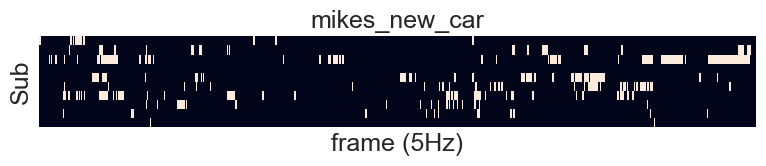

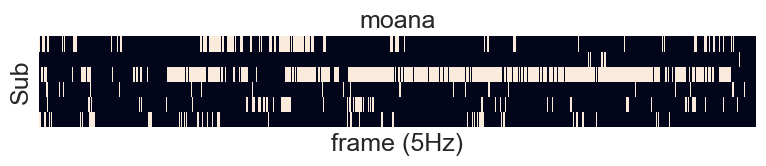

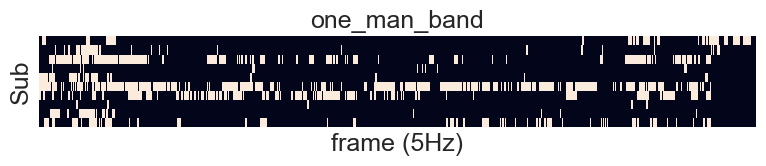

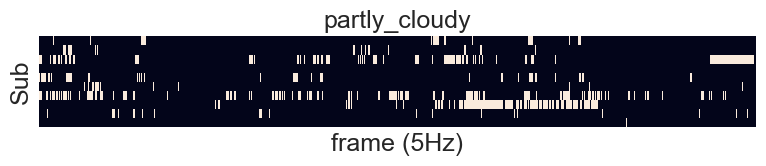

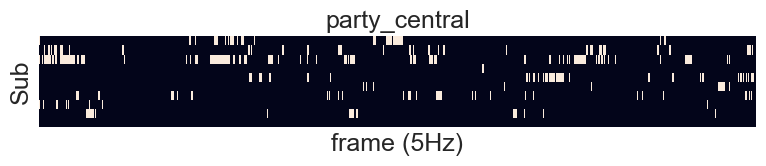

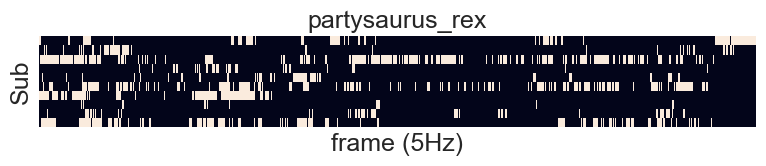

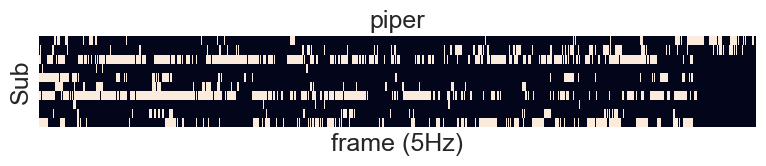

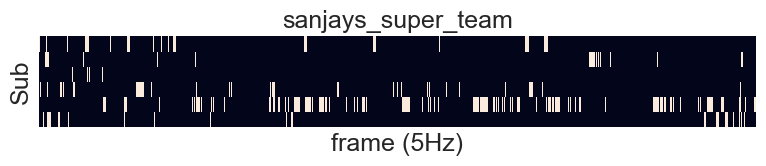

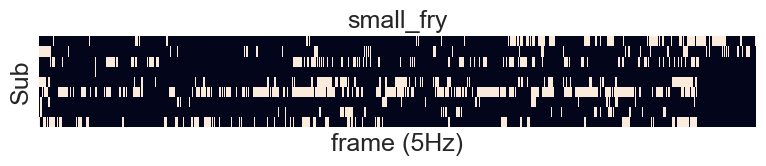

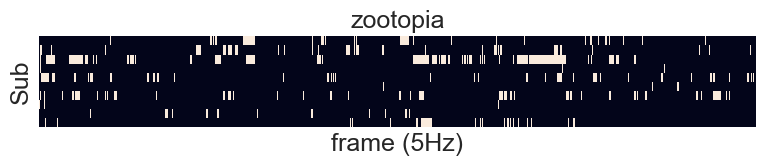

In [24]:
for mov in clipinfo.index:
    plt.figure(figsize=(8,2))
    sns.heatmap(clipmotion[mov].T>0.9, vmax=1, cbar=False)   
    plt.xticks([])
    plt.ylabel('Sub')
    plt.xlabel('frame (5Hz)')
    plt.yticks([])
    plt.title(mov)
    
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_{0}_motion_cens09_timeplot.png'.format(mov)), dpi=200)
    plt.show()
    plt.close()

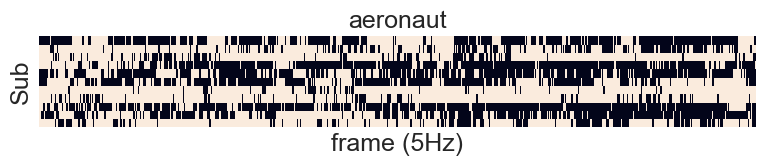

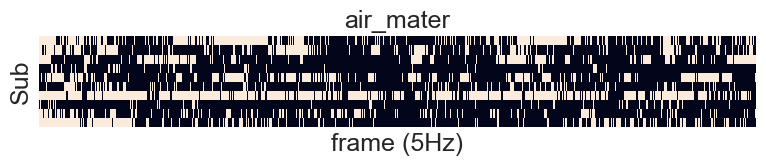

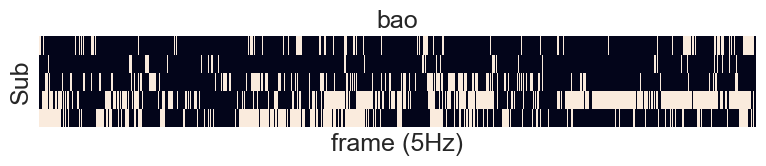

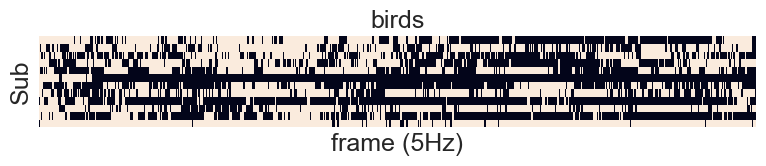

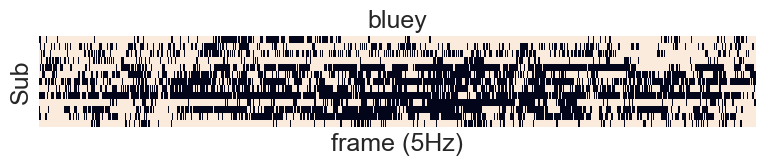

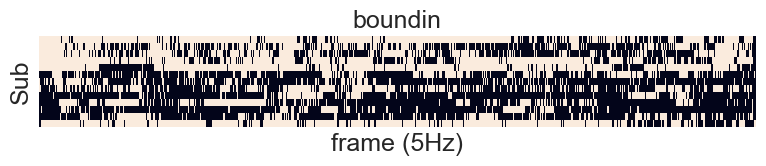

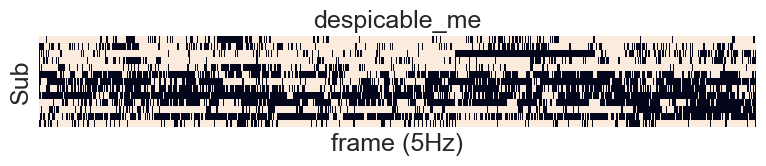

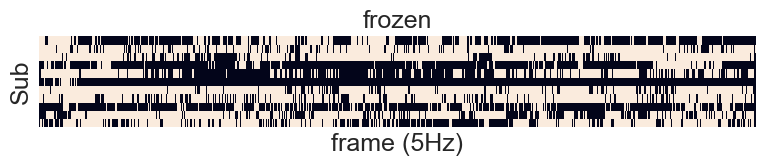

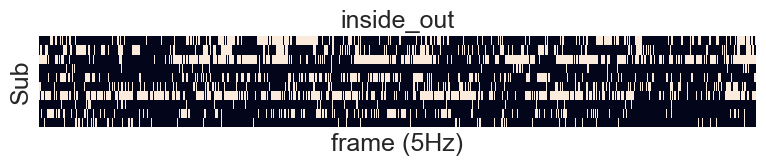

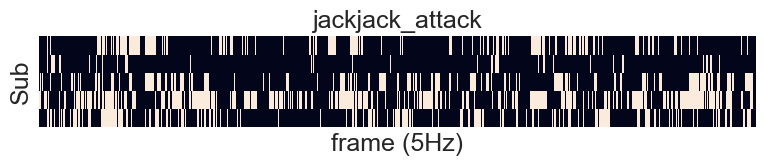

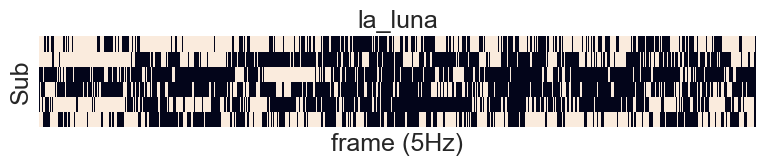

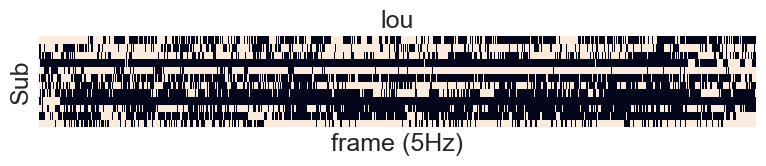

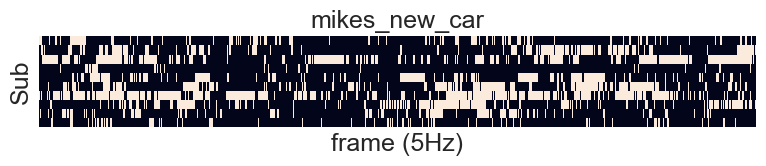

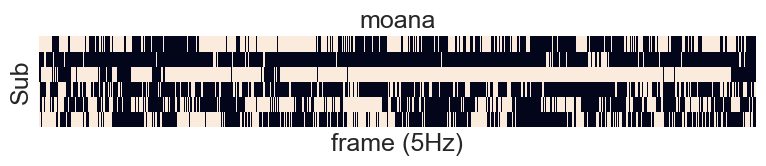

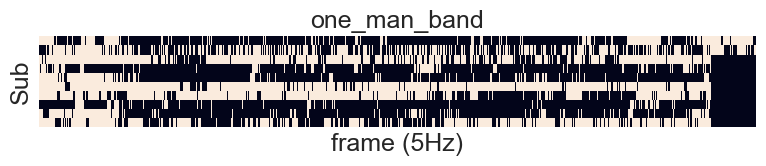

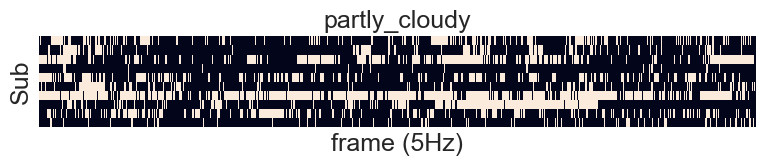

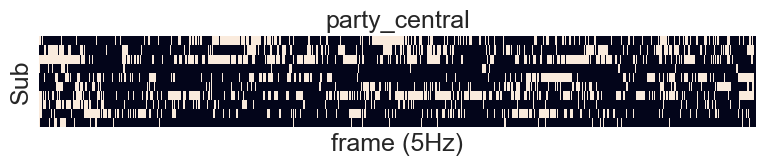

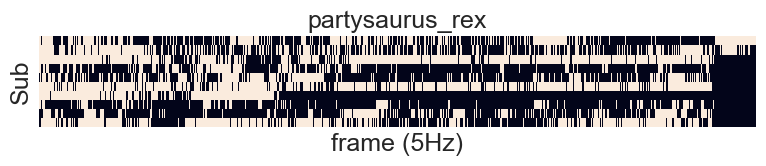

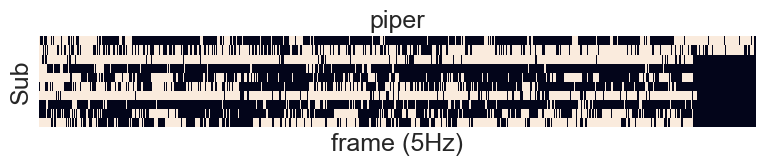

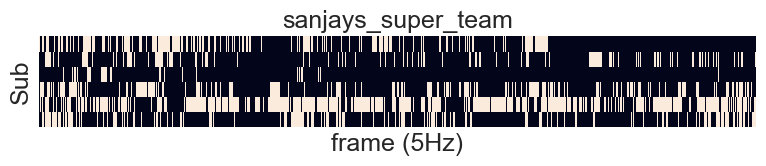

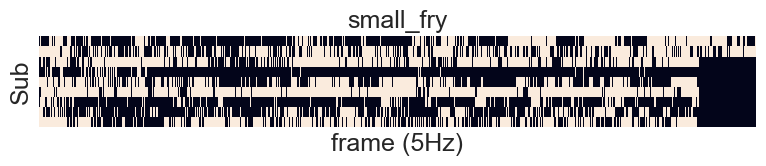

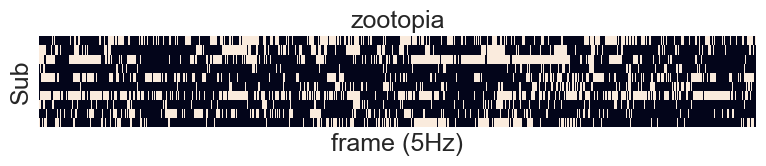

In [25]:
for mov in clipinfo.index:
    plt.figure(figsize=(8,2))
    sns.heatmap(clipmotion[mov].T>0.2, vmax=1, cbar=False)   
    plt.xticks([])
    plt.ylabel('Sub')
    plt.xlabel('frame (5Hz)')
    plt.yticks([])
    plt.title(mov)
    
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_{0}_motion_cens02_timeplot.png'.format(mov)), dpi=200)
    plt.show()
    plt.close()

# examine ratings

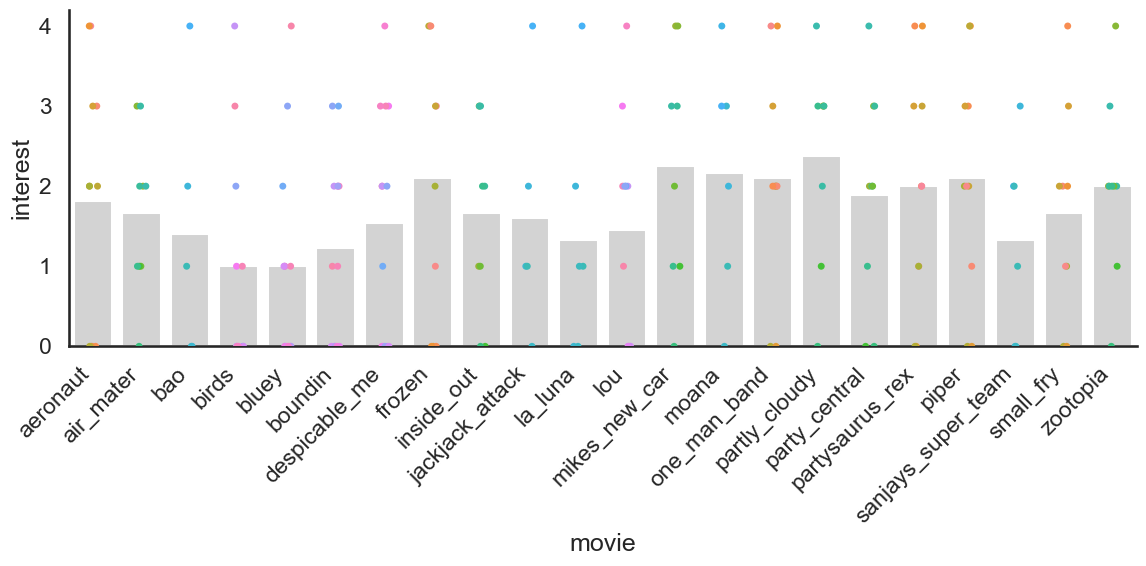

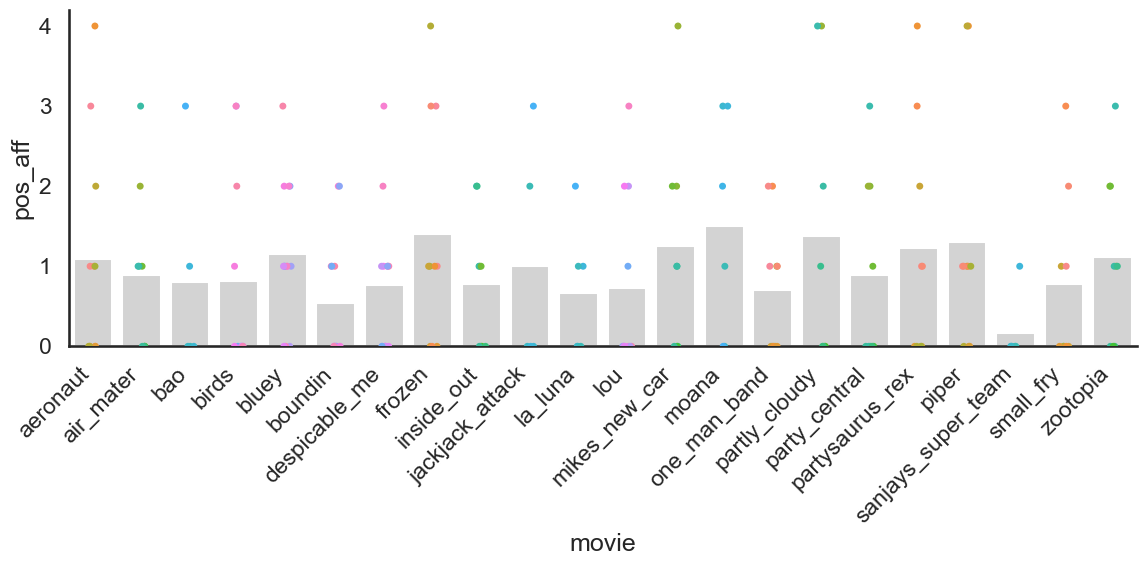

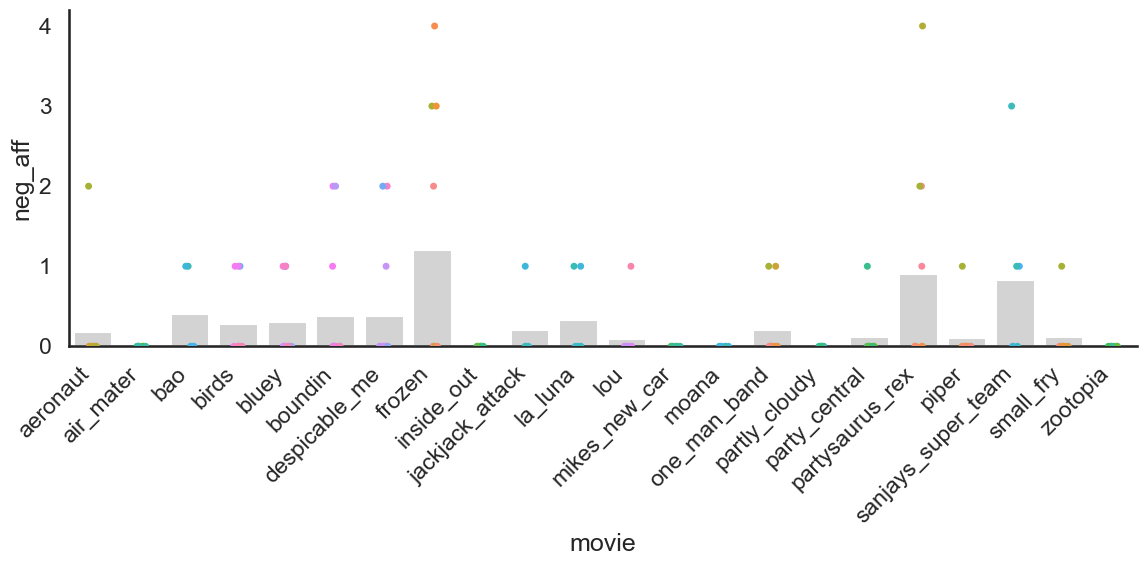

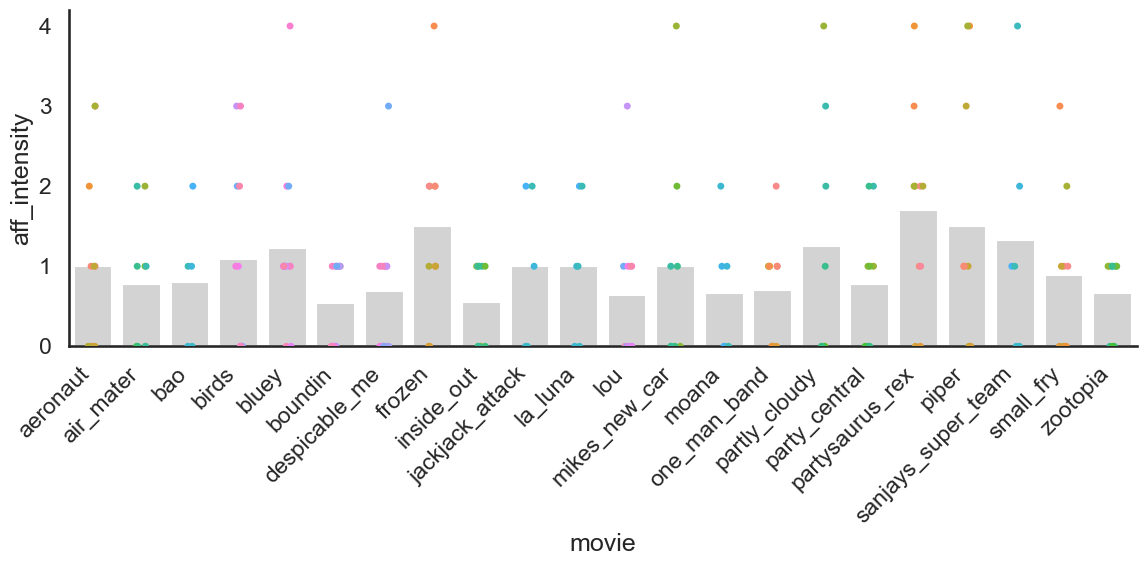

In [26]:
for v in ['interest', 'pos_aff', 'neg_aff','aff_intensity']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=data, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='movie', data=data, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_affect_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

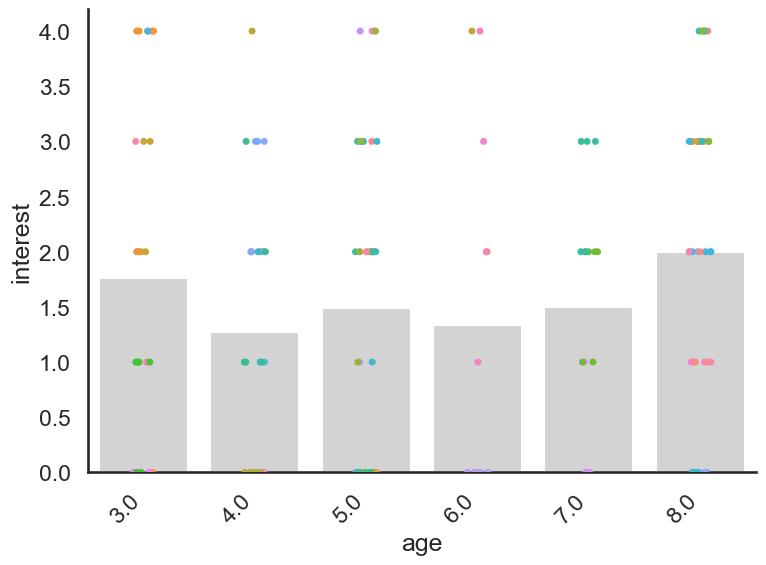

No handles with labels found to put in legend.


<Figure size 800x600 with 0 Axes>

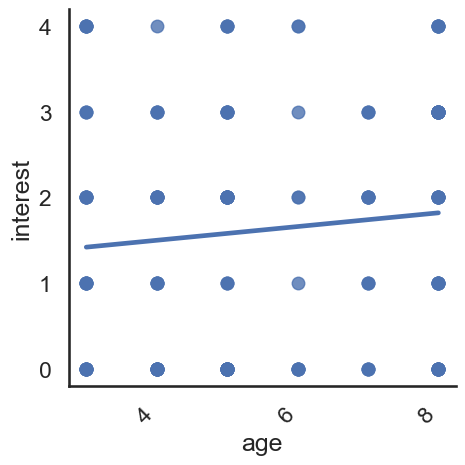

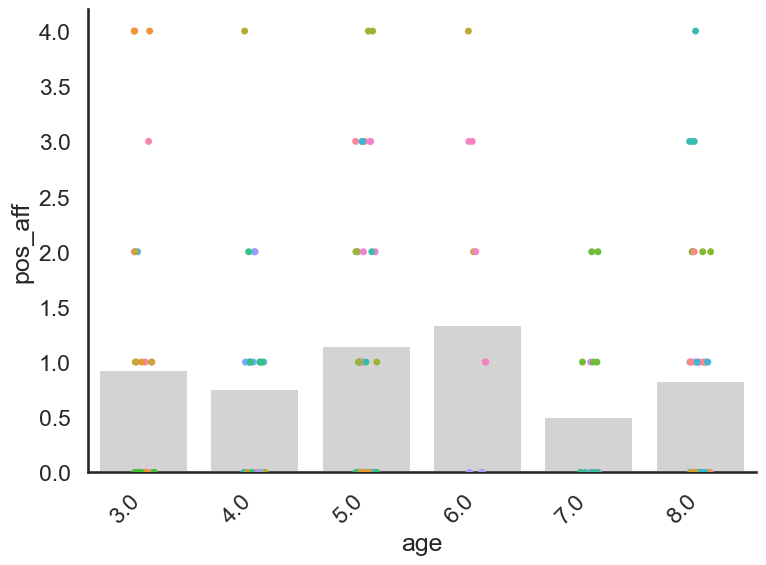

No handles with labels found to put in legend.


<Figure size 800x600 with 0 Axes>

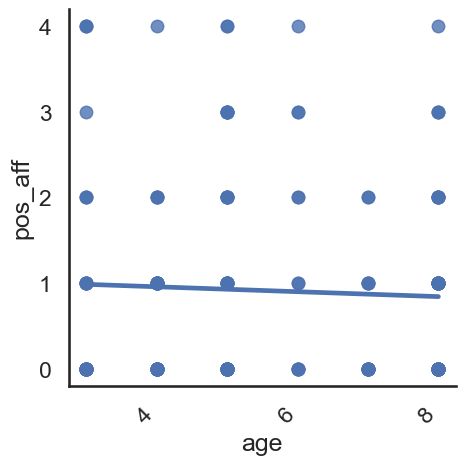

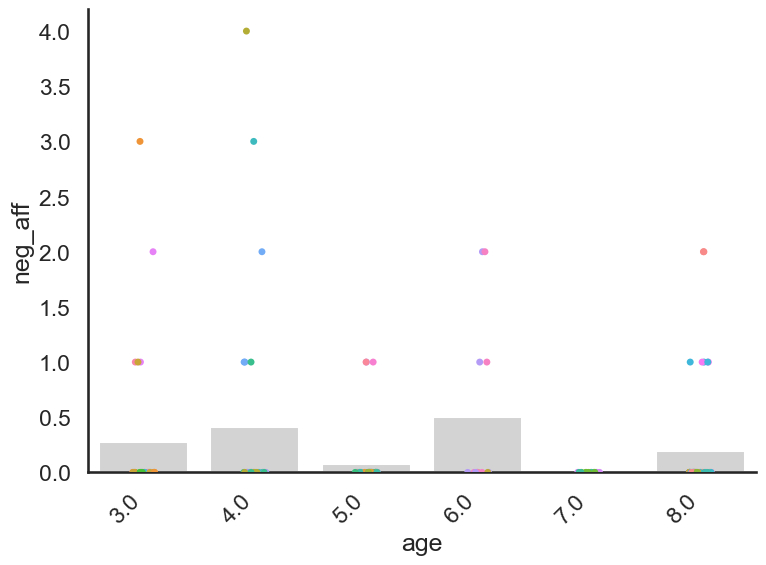

No handles with labels found to put in legend.


<Figure size 800x600 with 0 Axes>

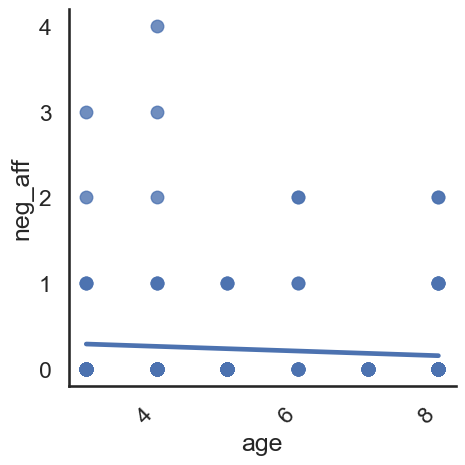

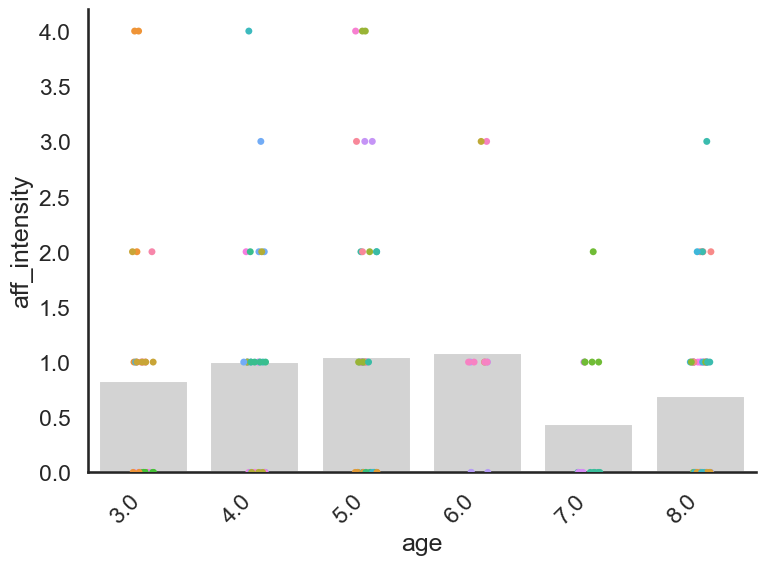

No handles with labels found to put in legend.


<Figure size 800x600 with 0 Axes>

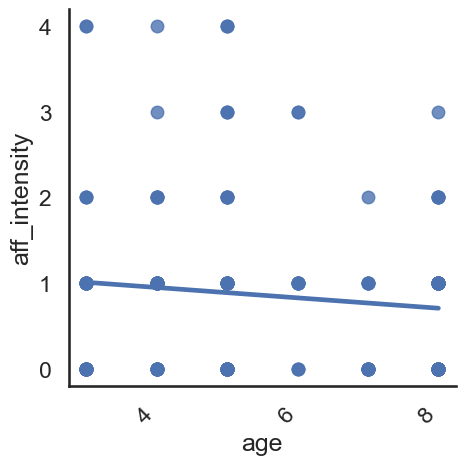

In [27]:
for v in ['interest', 'pos_aff', 'neg_aff','aff_intensity']:

    plt.figure(figsize=(8,6))
    sns.barplot(y=v,x='age', data=data, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='age', data=data, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_age_affect_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()
    
    plt.figure(figsize=(8,6))
    sns.lmplot(y=v,x='age', data=data, scatter=True, ci=None)
    #sns.stripplot(y=v,x='age', data=data, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_age_affect_{0}_lineplot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

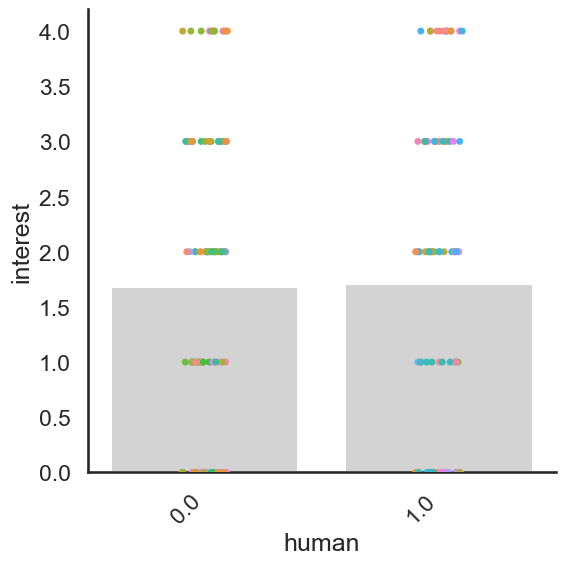

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: interest 
No. Observations: 169     Method:             REML     
No. Groups:       34      Scale:              0.8882   
Min. group size:  1       Log-Likelihood:     -262.6551
Max. group size:  6       Converged:          Yes      
Mean group size:  5.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  1.575     0.205  7.685  0.000   1.173   1.977
human      0.115     0.164  0.701  0.483  -0.207   0.437
sub Var    1.056     0.367                              



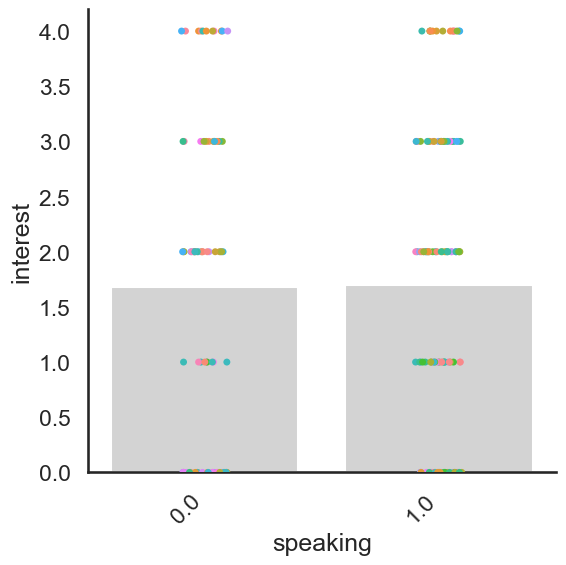

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: interest 
No. Observations: 169     Method:             REML     
No. Groups:       34      Scale:              0.8926   
Min. group size:  1       Log-Likelihood:     -262.8921
Max. group size:  6       Converged:          Yes      
Mean group size:  5.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.645    0.218  7.562 0.000  1.218  2.071
speaking     -0.031    0.163 -0.193 0.847 -0.351  0.288
sub Var       1.047    0.365                           



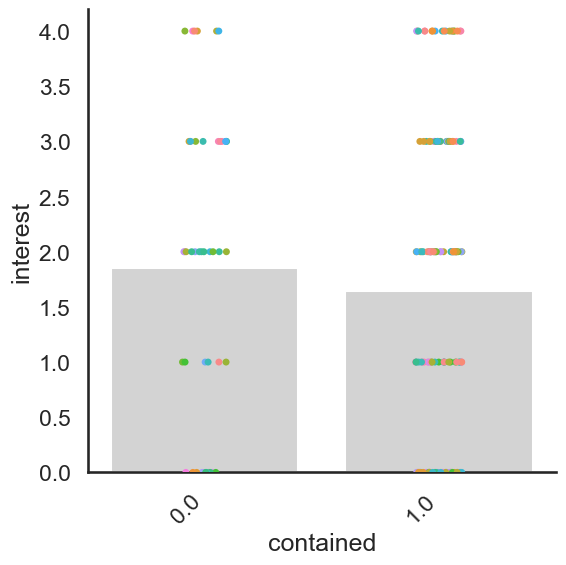

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: interest 
No. Observations: 169     Method:             REML     
No. Groups:       34      Scale:              0.8877   
Min. group size:  1       Log-Likelihood:     -262.2753
Max. group size:  6       Converged:          Yes      
Mean group size:  5.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.764    0.231  7.651 0.000  1.312  2.216
contained    -0.185    0.173 -1.071 0.284 -0.524  0.154
sub Var       1.034    0.361                           



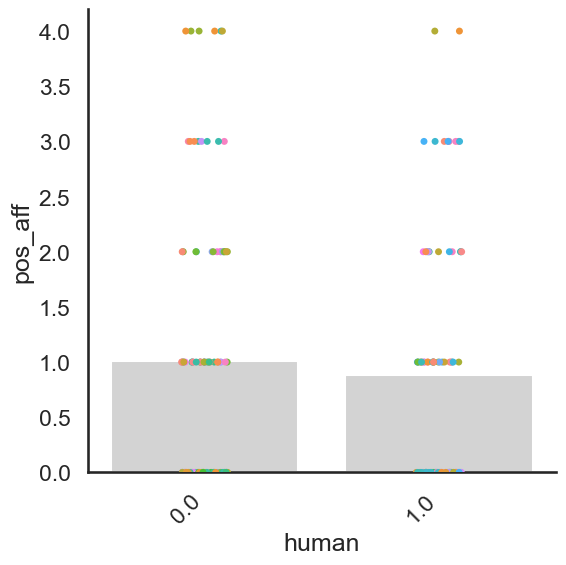

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pos_aff  
No. Observations: 169     Method:             REML     
No. Groups:       34      Scale:              0.8192   
Min. group size:  1       Log-Likelihood:     -247.4662
Max. group size:  6       Converged:          Yes      
Mean group size:  5.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.003    0.157  6.372 0.000  0.695  1.312
human        -0.177    0.155 -1.141 0.254 -0.482  0.127
sub Var       0.511    0.214                           



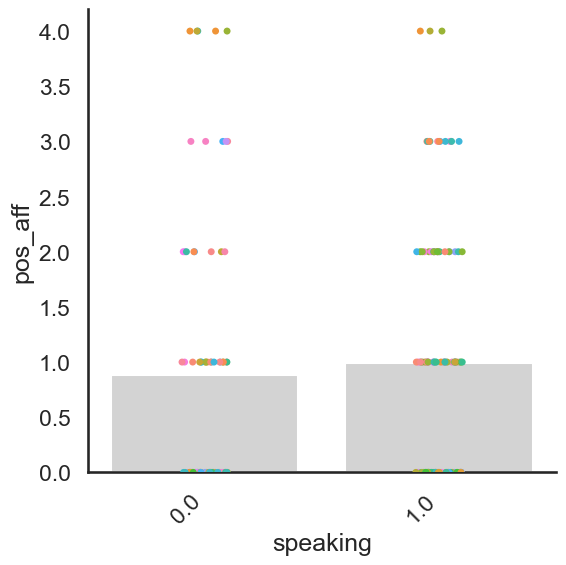

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pos_aff  
No. Observations: 169     Method:             REML     
No. Groups:       34      Scale:              0.8253   
Min. group size:  1       Log-Likelihood:     -248.1041
Max. group size:  6       Converged:          Yes      
Mean group size:  5.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  0.908     0.174  5.232  0.000   0.568   1.249
speaking   0.029     0.155  0.190  0.849  -0.274   0.333
sub Var    0.515     0.215                              



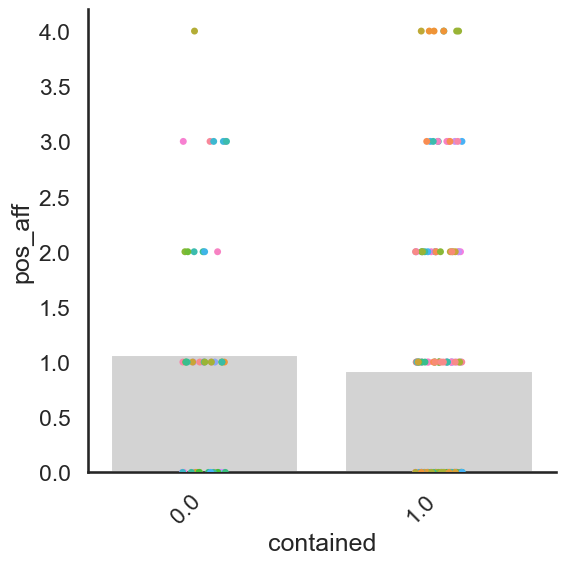

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pos_aff  
No. Observations: 169     Method:             REML     
No. Groups:       34      Scale:              0.8228   
Min. group size:  1       Log-Likelihood:     -247.7401
Max. group size:  6       Converged:          Yes      
Mean group size:  5.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.026    0.190  5.408 0.000  0.654  1.398
contained    -0.131    0.166 -0.791 0.429 -0.456  0.194
sub Var       0.512    0.214                           



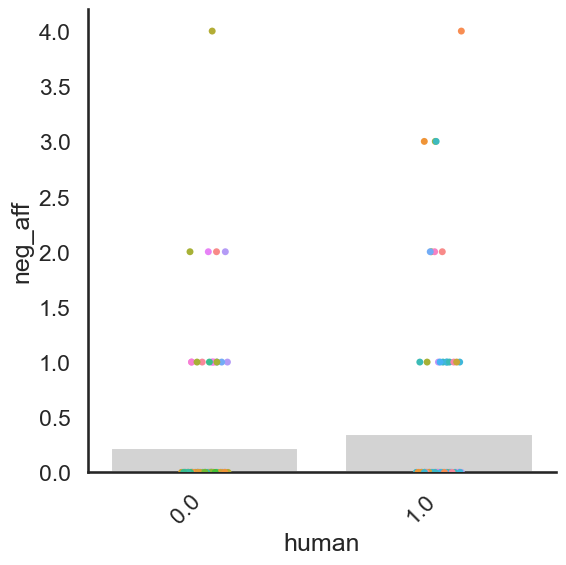

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: neg_aff  
No. Observations: 169     Method:             REML     
No. Groups:       34      Scale:              0.3532   
Min. group size:  1       Log-Likelihood:     -162.9364
Max. group size:  6       Converged:          No       
Mean group size:  5.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  0.210     0.074  2.845  0.004   0.065   0.356
human      0.032     0.100  0.318  0.751  -0.165   0.229
sub Var    0.049     0.091                              



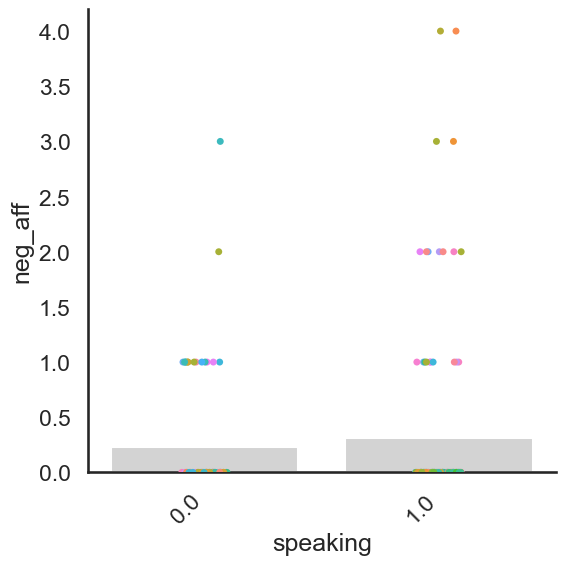

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: neg_aff  
No. Observations: 169     Method:             REML     
No. Groups:       34      Scale:              0.3731   
Min. group size:  1       Log-Likelihood:     -161.7109
Max. group size:  6       Converged:          No       
Mean group size:  5.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  0.155     0.083  1.870  0.061  -0.007   0.316
speaking   0.104     0.103  1.009  0.313  -0.098   0.305
sub Var    0.013     0.040                              



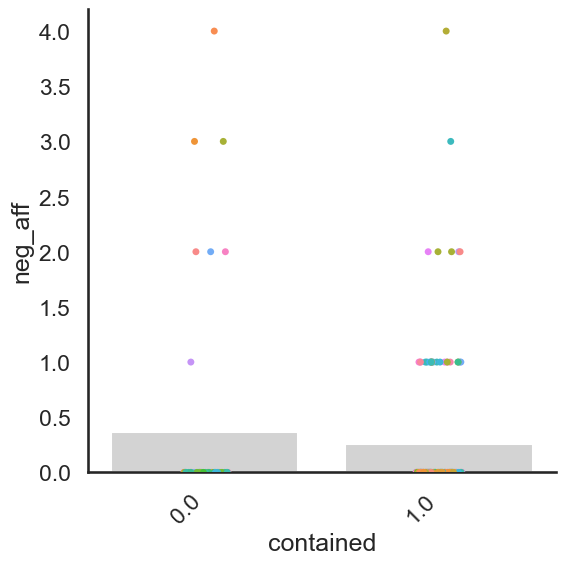

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: neg_aff  
No. Observations: 169     Method:             REML     
No. Groups:       34      Scale:              0.3618   
Min. group size:  1       Log-Likelihood:     -162.2670
Max. group size:  6       Converged:          No       
Mean group size:  5.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.263    0.101  2.614 0.009  0.066  0.461
contained    -0.054    0.110 -0.490 0.624 -0.269  0.162
sub Var       0.032    0.060                           



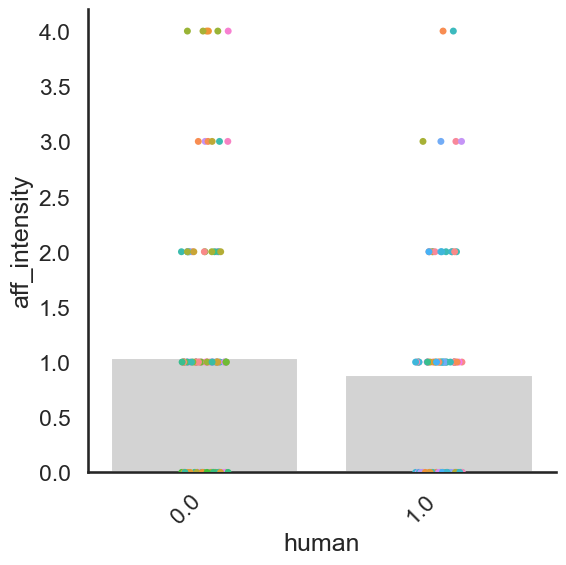

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: aff_intensity
No. Observations: 169     Method:             REML         
No. Groups:       34      Scale:              0.5860       
Min. group size:  1       Log-Likelihood:     -221.2762    
Max. group size:  6       Converged:          Yes          
Mean group size:  5.0                                      
------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept     1.015     0.140   7.265  0.000   0.741   1.289
human        -0.320     0.132  -2.421  0.015  -0.578  -0.061
sub Var       0.422     0.201                               



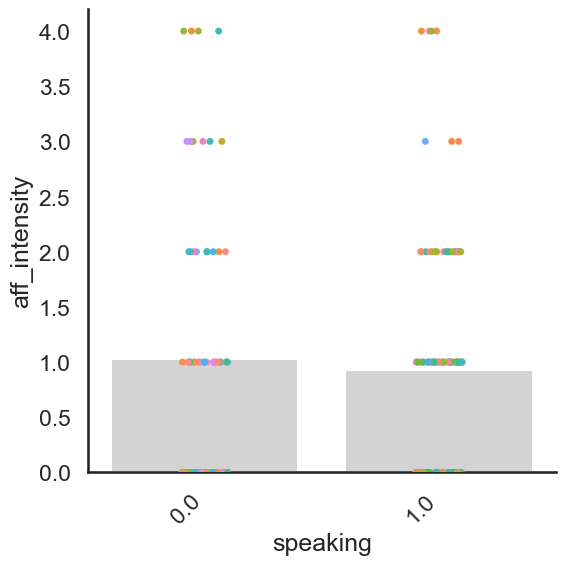

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: aff_intensity
No. Observations: 169     Method:             REML         
No. Groups:       34      Scale:              0.6131       
Min. group size:  1       Log-Likelihood:     -223.9889    
Max. group size:  6       Converged:          Yes          
Mean group size:  5.0                                      
------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept     0.924     0.152   6.086  0.000   0.626   1.221
speaking     -0.075     0.134  -0.562  0.574  -0.337   0.187
sub Var       0.405     0.191                               



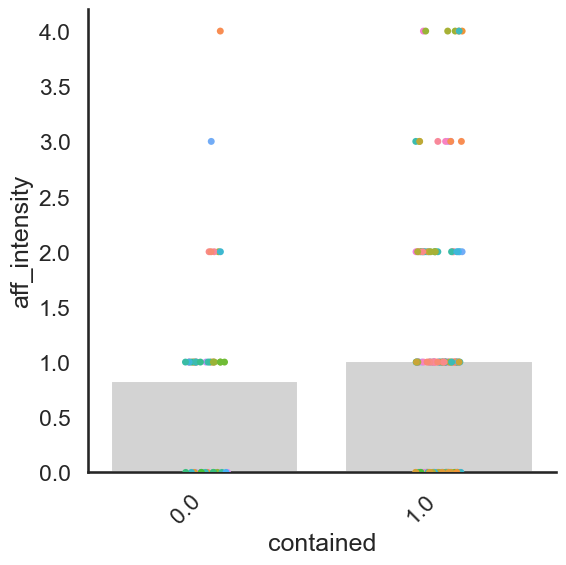

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: aff_intensity
No. Observations: 169     Method:             REML         
No. Groups:       34      Scale:              0.6079       
Min. group size:  1       Log-Likelihood:     -223.3624    
Max. group size:  6       Converged:          Yes          
Mean group size:  5.0                                      
------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept      0.747     0.166  4.506  0.000   0.422   1.072
contained      0.171     0.143  1.200  0.230  -0.108   0.450
sub Var        0.407     0.192                              



In [28]:
for v in ['interest', 'pos_aff', 'neg_aff','aff_intensity']:
    for f in ['human','speaking','contained']:

        plt.figure(figsize=(6,6))
        sns.barplot(y=v,x=f, data=data, color='lightgray', errwidth=0)
        sns.stripplot(y=v,x=f, data=data, hue='sub')
        plt.xticks(rotation=45, ha='right')
        sns.despine()
        plt.legend().remove()
        plt.tight_layout()
        plt.savefig(os.path.join(figs_dir, 'fullsample_feature_{0}_affect_{1}_plot.png'.format(f,v)), dpi=200)
        plt.show()
        plt.close()
        
        temp = data.dropna().copy()
        res = smf.mixedlm('{0} ~ {1}'.format(v,f), groups='sub', data=temp).fit()
        print(res.summary())